In [159]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

In [160]:
from multi_loc import covariance, assimilate

In [161]:
%matplotlib inline

In [162]:
def imshow(X, title=None, vmin=None, vmax=None, cmap=None):
    plt.figure()
    im = plt.imshow(X, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(im)
    plt.title(title)

In [163]:
dimension = 2**9
print(dimension)
rho0_l = 0.1
rho0_s = 0.005
# rho0 = 0.2
# dx = 0.25
dx = 1/dimension

# obs_size = int(dimension/2)
# H = assimilate.random_H(dimension, obs_size)

# H = np.eye(dimension)[::2]
H = np.eye(dimension)
obs_size = H.shape[0]

rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
rho = rho*dx

eig_val_l, eig_vec_l, P_l, sort_index = covariance.generate_circulant(
    dimension, dx, rho0_l, covariance.fft_sqd_exp_1d,
    return_Corr=True, return_sort_ind=True)
print('long variance: ', eig_val_l.mean())
eig_val_l = eig_val_l / eig_val_l.mean()
sort_index = np.argsort(sort_index)
eig_val_l = eig_val_l[sort_index]
eig_vec_l = eig_vec_l[:, sort_index]
P_l = eig_vec_l @ np.diag(eig_val_l) @ eig_vec_l.conj().T
P_l = P_l.real

eig_val_s, eig_vec_s, P_s, sort_index = covariance.generate_circulant(
    dimension, dx, rho0_s, covariance.fft_sqd_exp_1d,
    return_Corr=True, return_sort_ind=True)
print('short variance: ', eig_val_s.mean())
eig_val_s = eig_val_s / eig_val_s.mean()
sort_index = np.argsort(sort_index)
eig_val_s = eig_val_s[sort_index]
eig_vec_s = eig_vec_s[:, sort_index]
P_s = eig_vec_s @ np.diag(eig_val_s) @ eig_vec_s.conj().T
P_s = P_s.real
#P_s = P_s/P_s.max()

al = 0.5
eig_val = (1 - al) * eig_val_s + al * eig_val_l
eig_vec = eig_vec_l.copy()

eig_val = eig_val / eig_val.mean()

sort_index = np.argsort(eig_val)[::-1]
eig_val = eig_val[sort_index]
eig_vec = eig_vec[:, sort_index]

P = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T
P = P.real

sort_index = np.argsort(eig_val_l)[::-1]
eig_val_l = eig_val_l[sort_index]
eig_vec_l = eig_vec_l[:, sort_index]

sort_index = np.argsort(eig_val_s)[::-1]
eig_val_s = eig_val_s[sort_index]
eig_vec_s = eig_vec_s[:, sort_index]


R = np.eye(obs_size)

trans_mats_true = assimilate.transformation_matrices(
    H, eig_val_p=eig_val, eig_vec_p=eig_vec,
    R=R, return_Ts=True)


trans_mats_long = assimilate.transformation_matrices(
    H, eig_val_p=eig_val_l, eig_vec_p=eig_vec_l,
    R=R, return_Ts=True)


trans_mats_short = assimilate.transformation_matrices(
    H, eig_val_p=eig_val_s, eig_vec_p=eig_vec_s,
    R=R, return_Ts=True)

512
long variance:  0.9999999999999999
short variance:  0.9999999999999991


In [164]:
for key, val in trans_mats_true.items():
    command = key + ' = val'
    print(command)
    exec(command)

for key, val in trans_mats_long.items():
    command = key + '_l = val'
    print(command)
    exec(command)

for key, val in trans_mats_short.items():
    command = key + '_s = val'
    print(command)
    exec(command)

P_sqrt = val
P_inv_sqrt = val
R_sqrt = val
R_inv_sqrt = val
U = val
S = val
VT = val
H = val
Tx = val
Tx_inv = val
Ty = val
Ty_inv = val
P_sqrt_l = val
P_inv_sqrt_l = val
R_sqrt_l = val
R_inv_sqrt_l = val
U_l = val
S_l = val
VT_l = val
H_l = val
Tx_l = val
Tx_inv_l = val
Ty_l = val
Ty_inv_l = val
P_sqrt_s = val
P_inv_sqrt_s = val
R_sqrt_s = val
R_inv_sqrt_s = val
U_s = val
S_s = val
VT_s = val
H_s = val
Tx_s = val
Tx_inv_s = val
Ty_s = val
Ty_inv_s = val


Log10(condition):  15.352584640137643


Text(0.5,0.98,'Eigenvalues P_s')

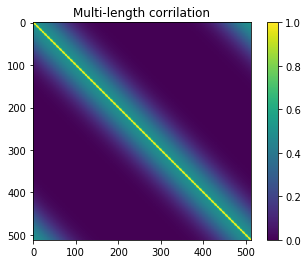

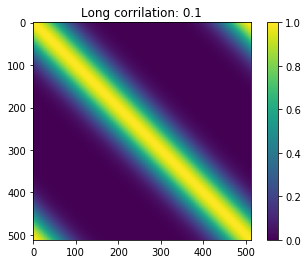

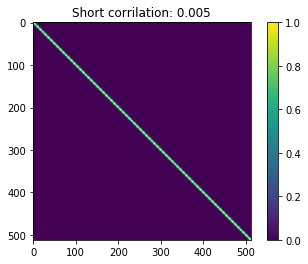

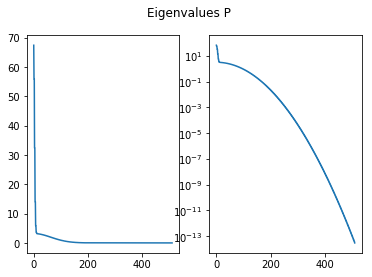

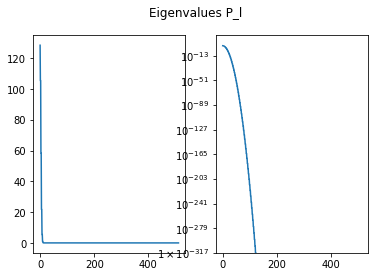

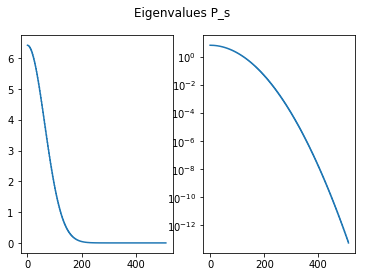

In [165]:
imshow(P, title='Multi-length corrilation', vmin=0, vmax=1)
imshow(P_l, title=f'Long corrilation: {rho0_l}', vmin=0, vmax=1)
imshow(P_s, title=f'Short corrilation: {rho0_s}', vmin=0, vmax=1)

print('Log10(condition): ',
      np.log10(np.linalg.cond(P)))

fig, ax = plt.subplots(1, 2)
ax[0].plot(eig_val)
ax[1].semilogy(eig_val)
plt.suptitle('Eigenvalues P')

fig, ax = plt.subplots(1, 2)
ax[0].plot(eig_val_l)
ax[1].semilogy(eig_val_l)
plt.suptitle('Eigenvalues P_l')

fig, ax = plt.subplots(1, 2)
ax[0].plot(eig_val_s)
ax[1].semilogy(eig_val_s)
plt.suptitle('Eigenvalues P_s')

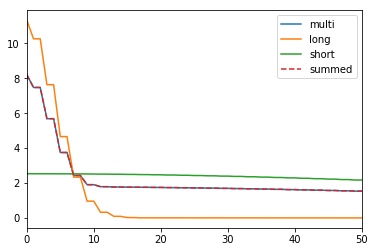

In [175]:
this = np.sqrt(0.5 * (S_l.diagonal()**2 + S_s.diagonal()**2))

plt.figure()
plt.plot(S.diagonal())
plt.plot(S_l.diagonal())
plt.plot(S_s.diagonal())
plt.plot(this, '--')
plt.xlim([0, 50])
plt.legend(['multi', 'long', 'short', 'summed'])

In [283]:
ens_size = 40
mu = np.zeros(dimension)

ensemble_s = (
    assimilate.generate_ensemble(
        ens_size, mu, P_sqrt_s))

ensemble_l = (
    assimilate.generate_ensemble(
        ens_size, mu, P_sqrt_l))

ensemble = np.sqrt(0.5)*(ensemble_s + ensemble_l)


P_sample_s = np.cov(ensemble_s)
P_sample_l = np.cov(ensemble_l)
P_sample = np.cov(ensemble)

In [284]:
from scipy import ndimage

In [285]:
ensemble.shape

(512, 40)

In [288]:
ensemble_smooth = ndimage.gaussian_filter1d(ensemble, sigma=5, mode='wrap', axis=0)
P_sample_smoothed = np.cov(ensemble_smooth)

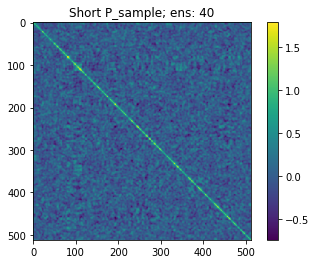

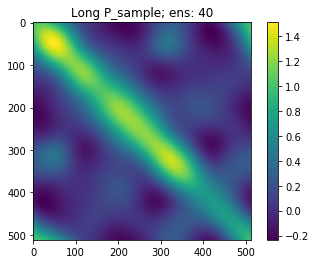

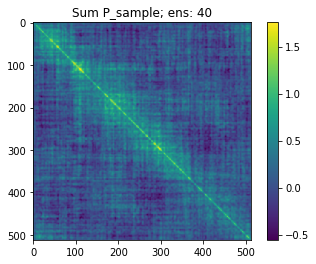

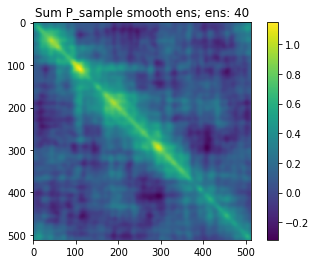

In [289]:
imshow(P_sample_s, f'Short P_sample; ens: {ens_size}')
imshow(P_sample_l, f'Long P_sample; ens: {ens_size}')
imshow(P_sample, f'Sum P_sample; ens: {ens_size}')

imshow(P_sample_smoothed, f'Sum P_sample smooth ens; ens: {ens_size}')

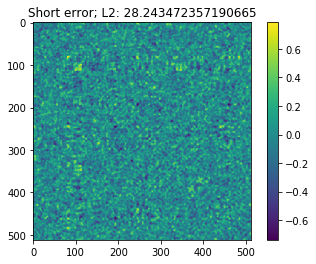

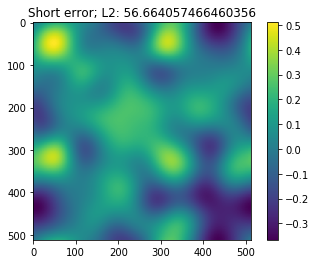

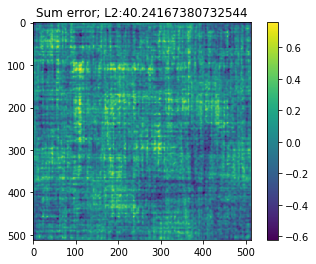

In [290]:
error_s = P_sample_s - P_s
L2 = np.linalg.norm(error_s, ord=2)
imshow(error_s, f'Short error; L2: {L2}')

error_l = P_sample_l - P_l
L2 = np.linalg.norm(error_l, ord=2)
imshow(error_l, f'Short error; L2: {L2}')

error = P_sample - P
L2 = np.linalg.norm(error, ord=2)
imshow(error, f'Sum error; L2:{L2}')

In [291]:
def localization_error(P_sample, P_truth, rho_loc):
    [loc] = covariance.generate_circulant(
        dimension, dx, rho_loc, covariance.fft_sqd_exp_1d,
        return_Corr=True, return_eig=False)
    loc /= loc.max()
    
    temp_P = P_sample * loc
    
#     temp_P_inv = np.linalg.inv(temp_P)
#     KL_err = (
#         np.trace(temp_P_inv @ P_truth) - P_truth.shape[0]
#         + np.log(np.linalg.det(P_sample)
#                  / np.linalg.det(P_truth)))
#     return KL_err
    
    L2_err = np.linalg.norm(temp_P - P_truth, ord=2)
    return L2_err

def loc_error_short(rho_loc):
    L2_err = localization_error(P_sample_s, P_s, rho_loc)
    return L2_err

def loc_error_long(rho_loc):
    L2_err = localization_error(P_sample_l, P_l, rho_loc)
    return L2_err

In [292]:
opt_returned_s = optimize.minimize_scalar(loc_error_short, bounds=(0, None))
print(opt_returned_s)
rho_s = opt_returned_s.x
err_s = opt_returned_s.fun

opt_returned_l = optimize.minimize_scalar(loc_error_long, bounds=(0, None))
print(opt_returned_l)
rho_l = opt_returned_l.x
err_l = opt_returned_l.fun

/home/travisharty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


     fun: 2.900627978217121
    nfev: 52
     nit: 48
 success: True
       x: 0.007470565855414434
     fun: 38.52887333808345
    nfev: 45
     nit: 41
 success: True
       x: 0.2668479702033837


In [293]:
[loc_s] = covariance.generate_circulant(
    dimension, dx, rho_s, covariance.fft_sqd_exp_1d,
    return_Corr=True, return_eig=False)
loc_s /= loc_s.max()
P_loc_s = P_sample_s * loc_s

[loc_l] = covariance.generate_circulant(
    dimension, dx, rho_l, covariance.fft_sqd_exp_1d,
    return_Corr=True, return_eig=False)
loc_l /= loc_l.max()
P_loc_l = P_sample_l * loc_l

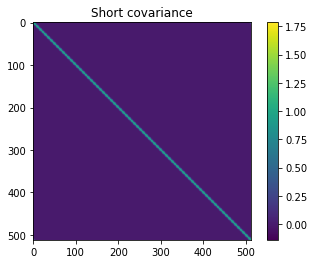

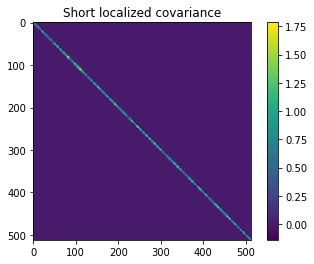

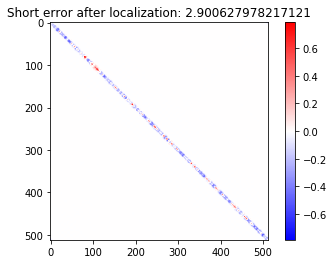

In [294]:
vmin = np.min([P_s.min(), P_loc_s.min()])
vmax = np.max([P_s.max(), P_loc_s.max()])
imshow(P_s, 'Short covariance',
       vmin=vmin, vmax=vmax)
imshow(P_loc_s, 'Short localized covariance')

error_s = P_loc_s - P_s
vmax = np.abs(error_s).max()
imshow(error_s, f'Short error after localization: {err_s}',
       vmin=-vmax, vmax=vmax, cmap='bwr')

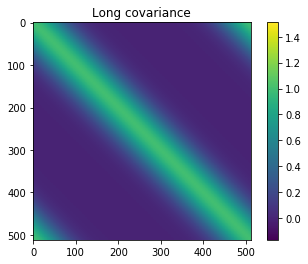

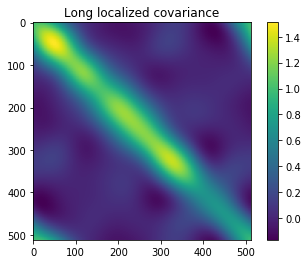

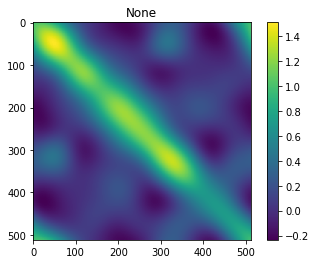

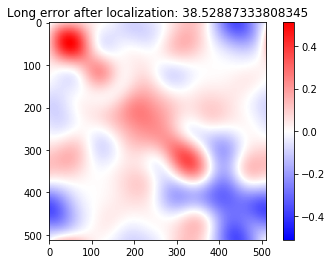

In [312]:
vmin = np.min([P_l.min(), P_loc_l.min()])
vmax = np.max([P_l.max(), P_loc_l.max()])
imshow(P_l, 'Long covariance',
       vmin=vmin, vmax=vmax)
imshow(P_loc_l, 'Long localized covariance')
imshow(P_sample_l)

error_l = P_loc_l - P_l
L2 = np.linalg.norm(error_l, ord=2)
vmax = np.abs(error_l).max()
imshow(error_l, f'Long error after localization: {L2}',
       vmin=-vmax, vmax=vmax, cmap='bwr')

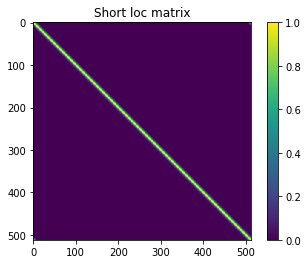

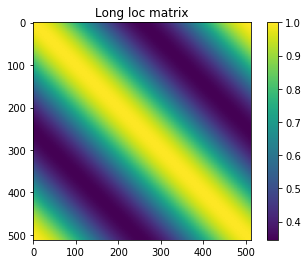

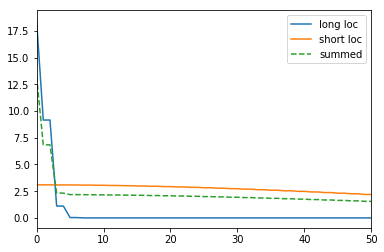

In [297]:
imshow(loc_s, 'Short loc matrix')
imshow(loc_l, 'Long loc matrix')

this = np.sqrt(0.5 * (S_loc_l.diagonal()**2 + S_loc_s.diagonal()**2))

plt.figure()
plt.plot(S_loc_l.diagonal())
plt.plot(S_loc_s.diagonal())
plt.plot(this, '--')
plt.xlim([0, 50])
plt.legend(['long loc', 'short loc', 'summed'])

In [313]:
trans_mats_loc_s = assimilate.transformation_matrices(
    H, P=P_sample_s,
    R=R, return_Ts=True)


trans_mats_loc_l = assimilate.transformation_matrices(
    H, P=P_sample_l,
    R=R, return_Ts=True)

for key, val in trans_mats_loc_l.items():
    command = key + '_sam_l = val'
    print(command)
    exec(command)

for key, val in trans_mats_loc_s.items():
    command = key + '_sam_s = val'
    print(command)
    exec(command)

P_sqrt_sam_l = val
P_inv_sqrt_sam_l = val
R_sqrt_sam_l = val
R_inv_sqrt_sam_l = val
U_sam_l = val
S_sam_l = val
VT_sam_l = val
H_sam_l = val
Tx_sam_l = val
Tx_inv_sam_l = val
Ty_sam_l = val
Ty_inv_sam_l = val
P_sqrt_sam_s = val
P_inv_sqrt_sam_s = val
R_sqrt_sam_s = val
R_inv_sqrt_sam_s = val
U_sam_s = val
S_sam_s = val
VT_sam_s = val
H_sam_s = val
Tx_sam_s = val
Tx_inv_sam_s = val
Ty_sam_s = val
Ty_inv_sam_s = val


In [301]:
trans_mats_loc_s = assimilate.transformation_matrices(
    H, P=P_loc_s,
    R=R, return_Ts=True)


trans_mats_loc_l = assimilate.transformation_matrices(
    H, P=P_loc_l,
    R=R, return_Ts=True)

for key, val in trans_mats_loc_l.items():
    command = key + '_P_loc_l = val'
    print(command)
    exec(command)

for key, val in trans_mats_loc_s.items():
    command = key + '_P_loc_s = val'
    print(command)
    exec(command)

P_sqrt_P_loc_l = val
P_inv_sqrt_P_loc_l = val
R_sqrt_P_loc_l = val
R_inv_sqrt_P_loc_l = val
U_P_loc_l = val
S_P_loc_l = val
VT_P_loc_l = val
H_P_loc_l = val
Tx_P_loc_l = val
Tx_inv_P_loc_l = val
Ty_P_loc_l = val
Ty_inv_P_loc_l = val
P_sqrt_P_loc_s = val
P_inv_sqrt_P_loc_s = val
R_sqrt_P_loc_s = val
R_inv_sqrt_P_loc_s = val
U_P_loc_s = val
S_P_loc_s = val
VT_P_loc_s = val
H_P_loc_s = val
Tx_P_loc_s = val
Tx_inv_P_loc_s = val
Ty_P_loc_s = val
Ty_inv_P_loc_s = val


In [300]:
trans_mats_loc_s = assimilate.transformation_matrices(
    H, P=loc_s,
    R=R, return_Ts=True)


trans_mats_loc_l = assimilate.transformation_matrices(
    H, P=loc_l,
    R=R, return_Ts=True)

for key, val in trans_mats_loc_l.items():
    command = key + '_loc_l = val'
    print(command)
    exec(command)

for key, val in trans_mats_loc_s.items():
    command = key + '_loc_s = val'
    print(command)
    exec(command)

P_sqrt_loc_l = val
P_inv_sqrt_loc_l = val
R_sqrt_loc_l = val
R_inv_sqrt_loc_l = val
U_loc_l = val
S_loc_l = val
VT_loc_l = val
H_loc_l = val
Tx_loc_l = val
Tx_inv_loc_l = val
Ty_loc_l = val
Ty_inv_loc_l = val
P_sqrt_loc_s = val
P_inv_sqrt_loc_s = val
R_sqrt_loc_s = val
R_inv_sqrt_loc_s = val
U_loc_s = val
S_loc_s = val
VT_loc_s = val
H_loc_s = val
Tx_loc_s = val
Tx_inv_loc_s = val
Ty_loc_s = val
Ty_inv_loc_s = val


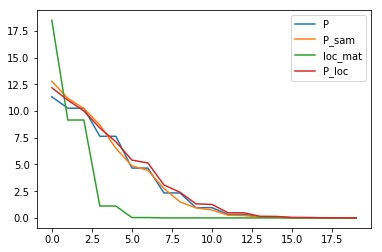

In [315]:
this_slice = slice(0, 20)
plt.figure()
plt.plot(S_l.diagonal()[this_slice])
plt.plot(S_sam_l.diagonal()[this_slice])
plt.plot(S_loc_l.diagonal()[this_slice])
plt.plot(S_P_loc_l.diagonal()[this_slice])
plt.legend(['P', 'P_sam', 'loc_mat', 'P_loc'])

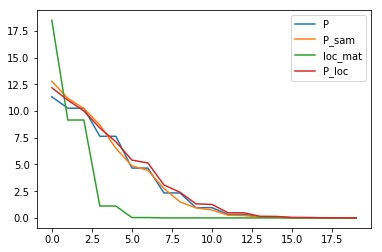

In [315]:
this_slice = slice(0, 20)
plt.figure()
plt.plot(S_l.diagonal()[this_slice])
plt.plot(S_sam_l.diagonal()[this_slice])
plt.plot(S_loc_l.diagonal()[this_slice])
plt.plot(S_P_loc_l.diagonal()[this_slice])
plt.legend(['P', 'P_sam', 'loc_mat', 'P_loc'])

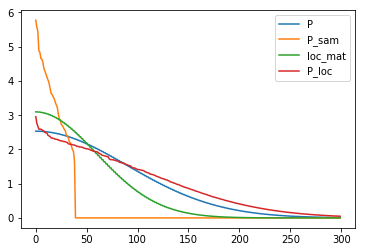

In [316]:
this_slice = slice(0, 300)
plt.figure()
plt.plot(S_s.diagonal()[this_slice])
plt.plot(S_sam_s.diagonal()[this_slice])
plt.plot(S_loc_s.diagonal()[this_slice])
plt.plot(S_P_loc_s.diagonal()[this_slice])
plt.legend(['P', 'P_sam', 'loc_mat', 'P_loc'])

Text(0,0.5,'Localization length')

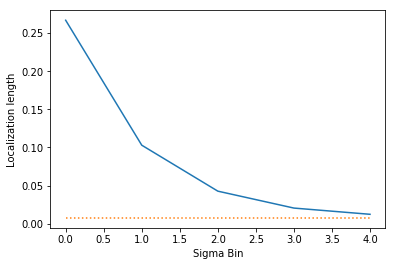

In [298]:
sig_num = np.arange(5)
rate = 1
opt_rho_array = (rho_l - rho_s) * np.exp(-sig_num * rate) + rho_s

plt.figure()
plt.plot(sig_num,
         opt_rho_array)
plt.plot(sig_num,
         np.ones_like(opt_rho_array)*rho_s, ':')
plt.xlabel('Sigma Bin')
plt.ylabel('Localization length')

In [219]:
bin_num = opt_rho_array.size
sig_array = np.concatenate(
    [[1], np.repeat([2], bin_num - 1)])

total_sig = sig_array.sum()
sig_bin_num = sig_array.size

est_rank = dimension

importlib.reload(assimilate)
results_dict = assimilate.multi_loc_dictate_rho(
    sig_array=sig_array, opt_rho_array=opt_rho_array,
    P_sample=P_sample,
    H=H, U=U, S=S, VT=VT,
    est_rank=est_rank)


slice(0, 1, None)

slice(1, 3, None)

slice(3, 5, None)

slice(5, 7, None)

slice(7, 9, None)


In [220]:
for key, val in results_dict.items():
    print(key)
    exec(key + '=val')

opt_U_array
opt_s_array
opt_V_array


In [221]:
trans_mats = assimilate.transformation_matrices(
    H, P=P_sample,
    R=R, return_Ts=True)

for key, val in trans_mats.items():
    print(key)
    exec(key + '_sample'+ '=val')

P_sqrt
P_inv_sqrt
R_sqrt
R_inv_sqrt
U
S
VT
H
Tx
Tx_inv
Ty
Ty_inv


In [222]:
print(np.sum(S.diagonal()[:est_rank + 1]**2))
print(np.sum(S_sample.diagonal()[:est_rank + 1]**2))
print(np.sum(opt_s_array[:est_rank + 1]**2))
scale = (
    np.sum(S_sample.diagonal()[:est_rank + 1]**2)
    / np.sum(opt_s_array[:est_rank + 1]**2))
opt_s_array_scaled = np.sqrt(opt_s_array[:est_rank + 1]**2 * scale)
# scale = ((sample_reconstruct @ H.T).diagonal().sum()
#          / (opt_reconstruct @ H.T).diagonal().sum())
# opt_s_array_scaled = opt_s_array[:total_sig] * scale
# opt_s_array_scaled = S.diagonal()[:total_sig]
print(scale)
print(np.sum(opt_s_array_scaled**2))

511.99999999999943
536.9854457528622
704.7019581942301
0.7620036236721485
536.9854457528623


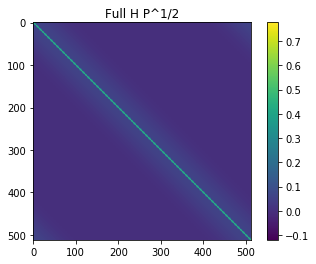

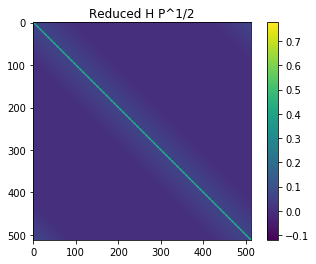

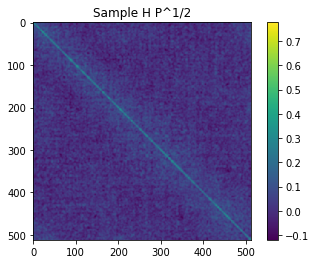

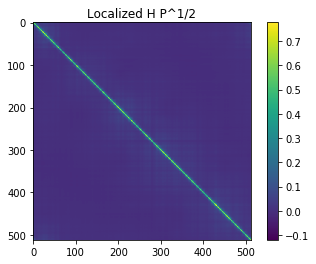

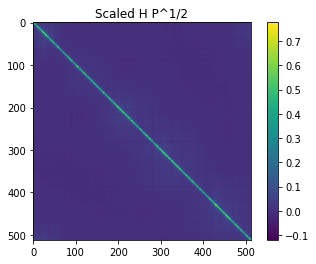

In [223]:
this_total_sig = est_rank
truth = H @ P_sqrt
true_reconstruct = (
    U[:, :this_total_sig]
    @ S[:this_total_sig, :this_total_sig]
    @ VT[:this_total_sig, :])
sample_reconstruct = (
    U_sample[:, :this_total_sig]
    @ S_sample[:this_total_sig, :this_total_sig]
    @ VT_sample[:this_total_sig, :])
# opt_reconstruct = (
#     opt_U_array[:, :total_sig]
#     @ S_sample[:total_sig, :total_sig]
#     @ opt_V_array[:, :total_sig].T)
opt_reconstruct = (
    opt_U_array[:, :this_total_sig]
    @ np.diag(opt_s_array[:this_total_sig])
    @ opt_V_array[:, :this_total_sig].T)

opt_reconstruct_scaled = (
    opt_U_array[:, :this_total_sig]
    @ np.diag(opt_s_array_scaled[:this_total_sig])
    @ opt_V_array[:, :this_total_sig].T)


vmin = np.min([
    truth.min(),
    true_reconstruct.min(),
    sample_reconstruct.min(),
    opt_reconstruct.min(),
    opt_reconstruct_scaled.min()
])
vmax = np.max([
    truth.max(),
    true_reconstruct.max(),
    sample_reconstruct.max(),
    opt_reconstruct.max(),
    opt_reconstruct_scaled.max()
])
imshow(truth,
       title='Full H P^1/2',
       vmin=vmin, vmax=vmax)
imshow(true_reconstruct,
       title='Reduced H P^1/2',
       vmin=vmin, vmax=vmax)
imshow(sample_reconstruct,
       title='Sample H P^1/2',
       vmin=vmin, vmax=vmax)
imshow(opt_reconstruct,
       title='Localized H P^1/2',
       vmin=vmin, vmax=vmax)
imshow(opt_reconstruct_scaled,
       title='Scaled H P^1/2',
       vmin=vmin, vmax=vmax)

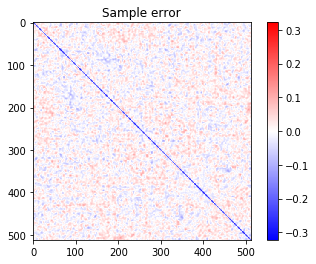

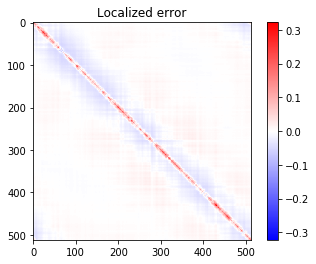

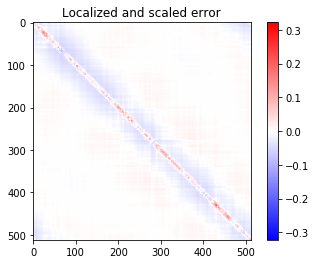

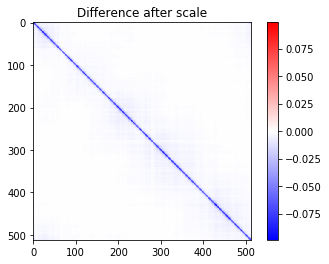

In [224]:
error_sample = (sample_reconstruct
                - true_reconstruct)
error_opt = (opt_reconstruct
             - true_reconstruct)
error_opt_scaled = (opt_reconstruct_scaled
                    - true_reconstruct)
diff_scaled = (opt_reconstruct_scaled
               - opt_reconstruct)

vmax = np.max([
    np.abs(error_sample).max(),
    np.abs(error_opt).max(),
    np.abs(error_opt_scaled).max()
])

imshow(error_sample,
       title='Sample error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')
imshow(error_opt,
       title='Localized error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')
imshow(error_opt_scaled,
       title='Localized and scaled error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')

vmax = np.abs(diff_scaled).max()
imshow(diff_scaled,
       title='Difference after scale',
       vmax=vmax,
       vmin=-vmax,
       cmap='bwr')

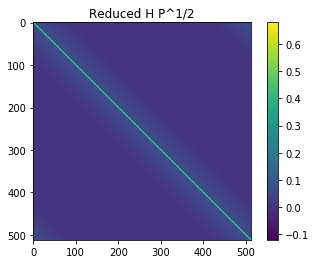

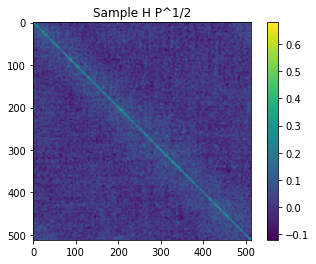

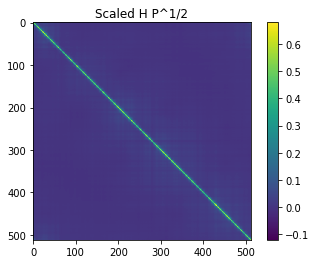

In [225]:
vmin = np.min([
    true_reconstruct.min(),
    sample_reconstruct.min(),
    opt_reconstruct_scaled.min()
])
vmax = np.max([
    true_reconstruct.max(),
    sample_reconstruct.max(),
    opt_reconstruct_scaled.max()
])

imshow(true_reconstruct,
       title='Reduced H P^1/2',
       vmin=vmin, vmax=vmax)
imshow(sample_reconstruct,
       title='Sample H P^1/2',
       vmin=vmin, vmax=vmax)
imshow(opt_reconstruct_scaled,
       title='Scaled H P^1/2',
       vmin=vmin, vmax=vmax)

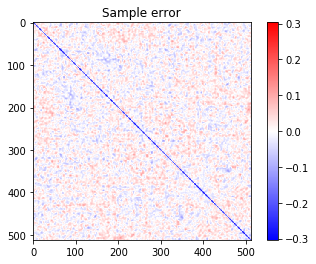

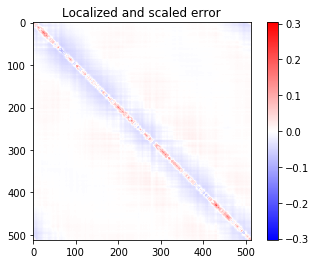

In [226]:
vmax = np.max([
    np.abs(error_sample).max(),
    np.abs(error_opt_scaled).max()
])

imshow(error_sample,
       title='Sample error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')
imshow(error_opt_scaled,
       title='Localized and scaled error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')

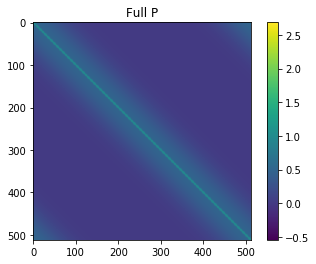

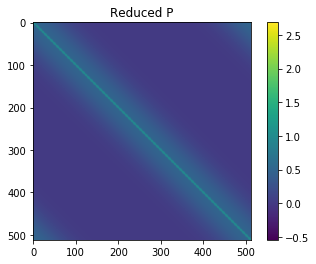

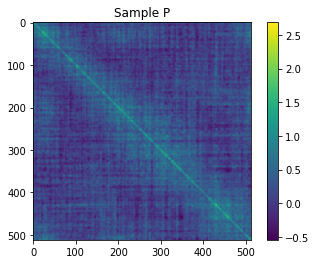

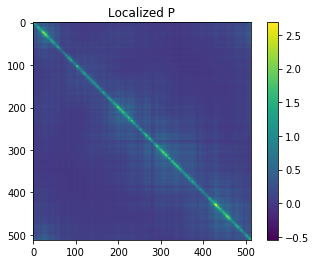

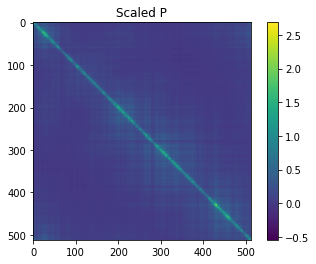

In [227]:
this_total_sig = est_rank
truth = H @ P_sqrt
truth = truth @ truth
true_reconstruct = (
    U[:, :this_total_sig]
    @ S[:this_total_sig, :this_total_sig]
    @ VT[:this_total_sig, :])
true_reconstruct = true_reconstruct @ true_reconstruct
sample_reconstruct = (
    U_sample[:, :this_total_sig]
    @ S_sample[:this_total_sig, :this_total_sig]
    @ VT_sample[:this_total_sig, :])
sample_reconstruct = sample_reconstruct @ sample_reconstruct
# opt_reconstruct = (
#     opt_U_array[:, :total_sig]
#     @ S_sample[:total_sig, :total_sig]
#     @ opt_V_array[:, :total_sig].T)
opt_reconstruct = (
    opt_U_array[:, :this_total_sig]
    @ np.diag(opt_s_array[:this_total_sig])
    @ opt_V_array[:, :this_total_sig].T)
opt_reconstruct = opt_reconstruct @ opt_reconstruct

opt_reconstruct_scaled = (
    opt_U_array[:, :this_total_sig]
    @ np.diag(opt_s_array_scaled[:this_total_sig])
    @ opt_V_array[:, :this_total_sig].T)
opt_reconstruct_scaled = opt_reconstruct_scaled @ opt_reconstruct_scaled


vmin = np.min([
    truth.min(),
    true_reconstruct.min(),
    sample_reconstruct.min(),
    opt_reconstruct.min(),
    opt_reconstruct_scaled.min()
])
vmax = np.max([
    truth.max(),
    true_reconstruct.max(),
    sample_reconstruct.max(),
    opt_reconstruct.max(),
    opt_reconstruct_scaled.max()
])
imshow(truth,
       title='Full P',
       vmin=vmin, vmax=vmax)
imshow(true_reconstruct,
       title='Reduced P',
       vmin=vmin, vmax=vmax)
imshow(sample_reconstruct,
       title='Sample P',
       vmin=vmin, vmax=vmax)
imshow(opt_reconstruct,
       title='Localized P',
       vmin=vmin, vmax=vmax)
imshow(opt_reconstruct_scaled,
       title='Scaled P',
       vmin=vmin, vmax=vmax)

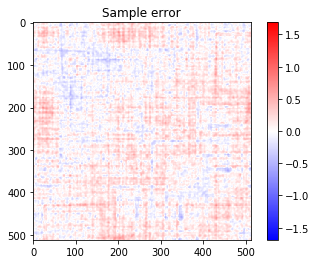

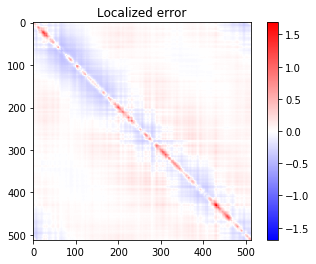

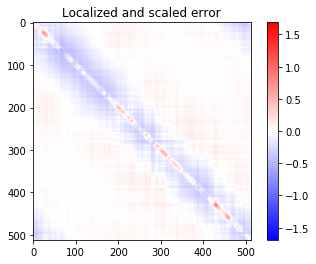

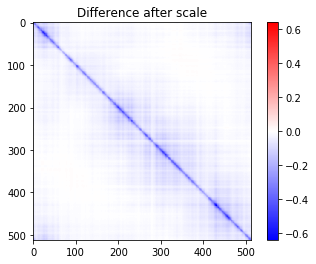

In [228]:
error_sample = (sample_reconstruct
                - true_reconstruct)
error_opt = (opt_reconstruct
             - true_reconstruct)
error_opt_scaled = (opt_reconstruct_scaled
                    - true_reconstruct)
diff_scaled = (opt_reconstruct_scaled
               - opt_reconstruct)

vmax = np.max([
    np.abs(error_sample).max(),
    np.abs(error_opt).max(),
    np.abs(error_opt_scaled).max()
])

imshow(error_sample,
       title='Sample error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')
imshow(error_opt,
       title='Localized error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')
imshow(error_opt_scaled,
       title='Localized and scaled error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')

vmax = np.abs(diff_scaled).max()
imshow(diff_scaled,
       title='Difference after scale',
       vmax=vmax,
       vmin=-vmax,
       cmap='bwr')

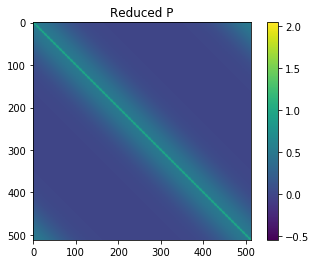

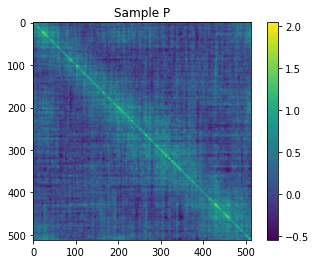

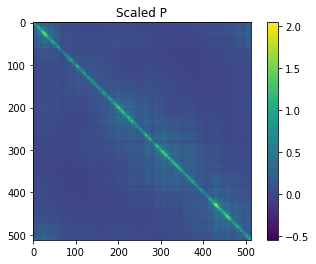

In [229]:
vmin = np.min([
    true_reconstruct.min(),
    sample_reconstruct.min(),
    opt_reconstruct_scaled.min()
])
vmax = np.max([
    true_reconstruct.max(),
    sample_reconstruct.max(),
    opt_reconstruct_scaled.max()
])

imshow(true_reconstruct,
       title='Reduced P',
       vmin=vmin, vmax=vmax)
imshow(sample_reconstruct,
       title='Sample P',
       vmin=vmin, vmax=vmax)
imshow(opt_reconstruct_scaled,
       title='Scaled P',
       vmin=vmin, vmax=vmax)

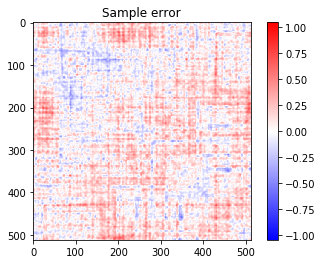

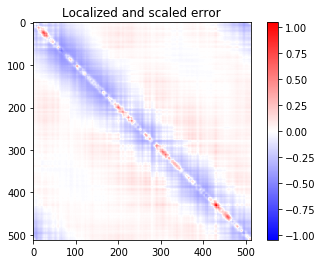

In [230]:
vmax = np.max([
    np.abs(error_sample).max(),
    np.abs(error_opt_scaled).max()
])

imshow(error_sample,
       title='Sample error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')
imshow(error_opt_scaled,
       title='Localized and scaled error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')

Text(0,0.5,'Singular value')

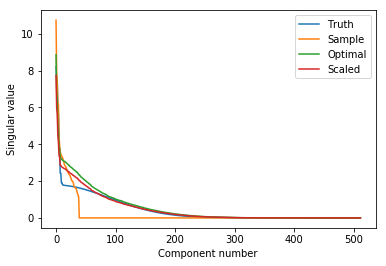

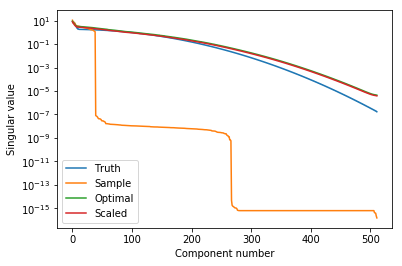

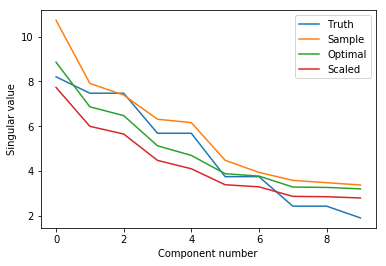

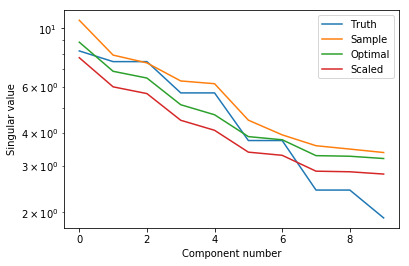

In [231]:
opt_sum = opt_s_array[:this_total_sig].sum()
sample_sum = S_sample.diagonal()[:this_total_sig].sum()
plt.figure()
plt.plot(S.diagonal()[:this_total_sig])
plt.plot(S_sample.diagonal()[:this_total_sig])
plt.plot(opt_s_array[:this_total_sig])
plt.plot(opt_s_array_scaled[:this_total_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

plt.figure()
plt.semilogy(S.diagonal()[:this_total_sig])
plt.semilogy(S_sample.diagonal()[:this_total_sig])
plt.semilogy(opt_s_array[:this_total_sig])
plt.semilogy(opt_s_array_scaled[:this_total_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')


this_max_sig = 10
plt.figure()
plt.plot(S.diagonal()[:this_max_sig])
plt.plot(S_sample.diagonal()[:this_max_sig])
plt.plot(opt_s_array[:this_max_sig])
plt.plot(opt_s_array_scaled[:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

plt.figure()
plt.semilogy(S.diagonal()[:this_max_sig])
plt.semilogy(S_sample.diagonal()[:this_max_sig])
plt.semilogy(opt_s_array[:this_max_sig])
plt.semilogy(opt_s_array_scaled[:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

Text(0,0.5,'Singular value')

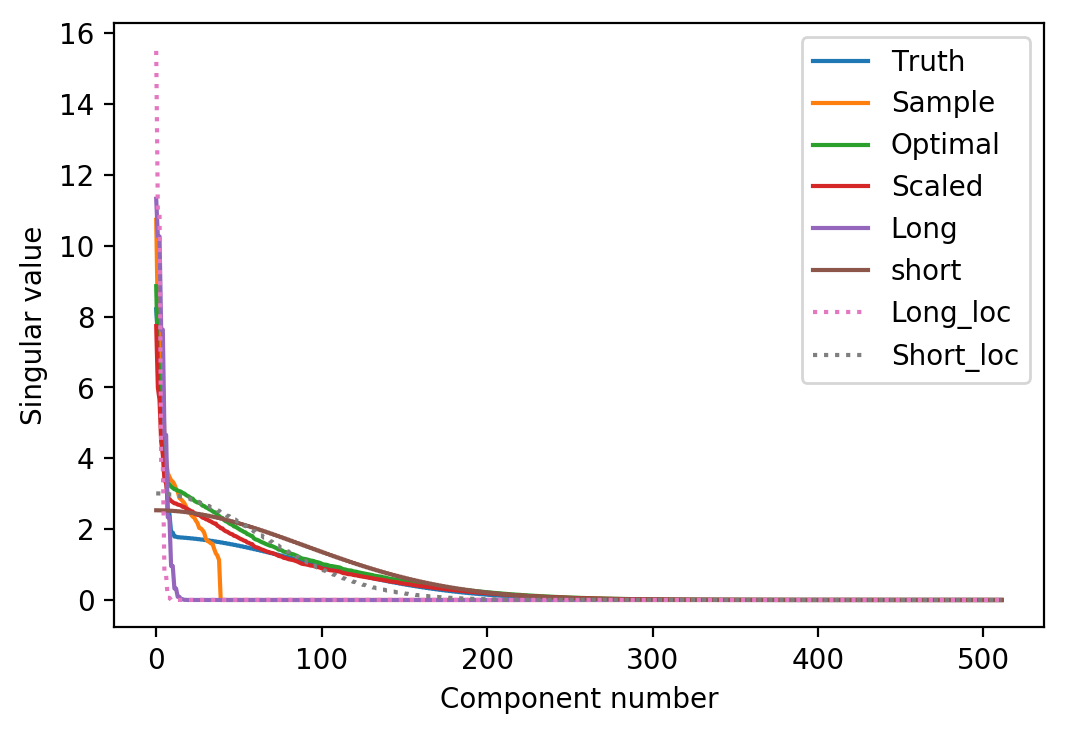

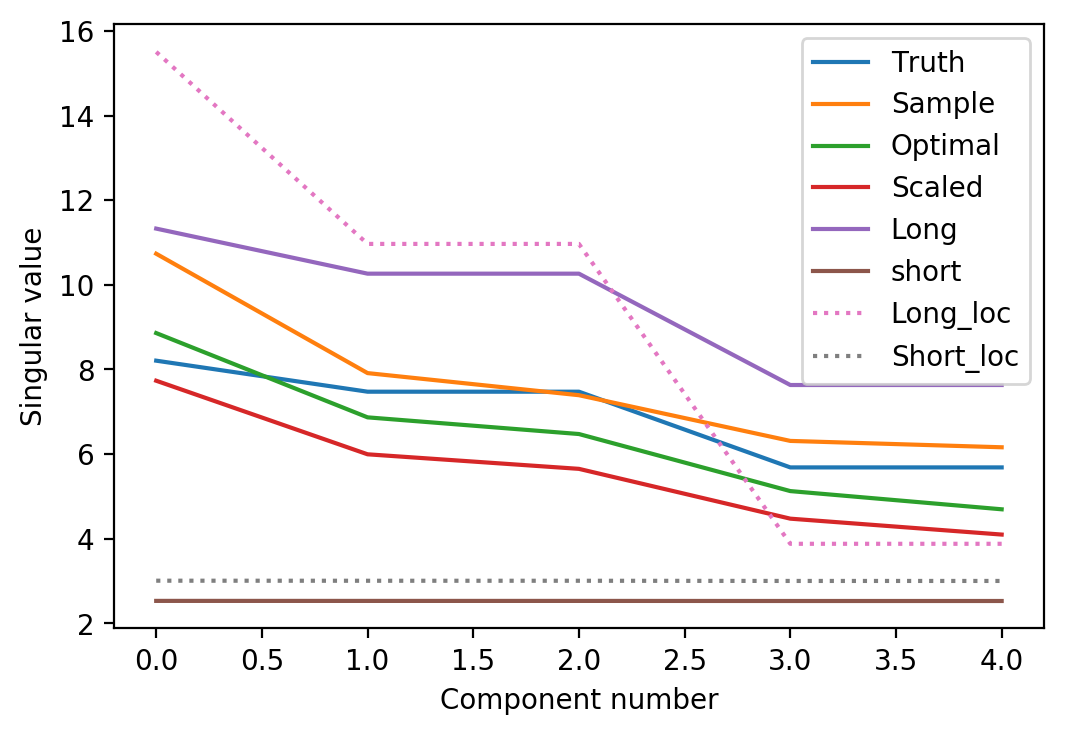

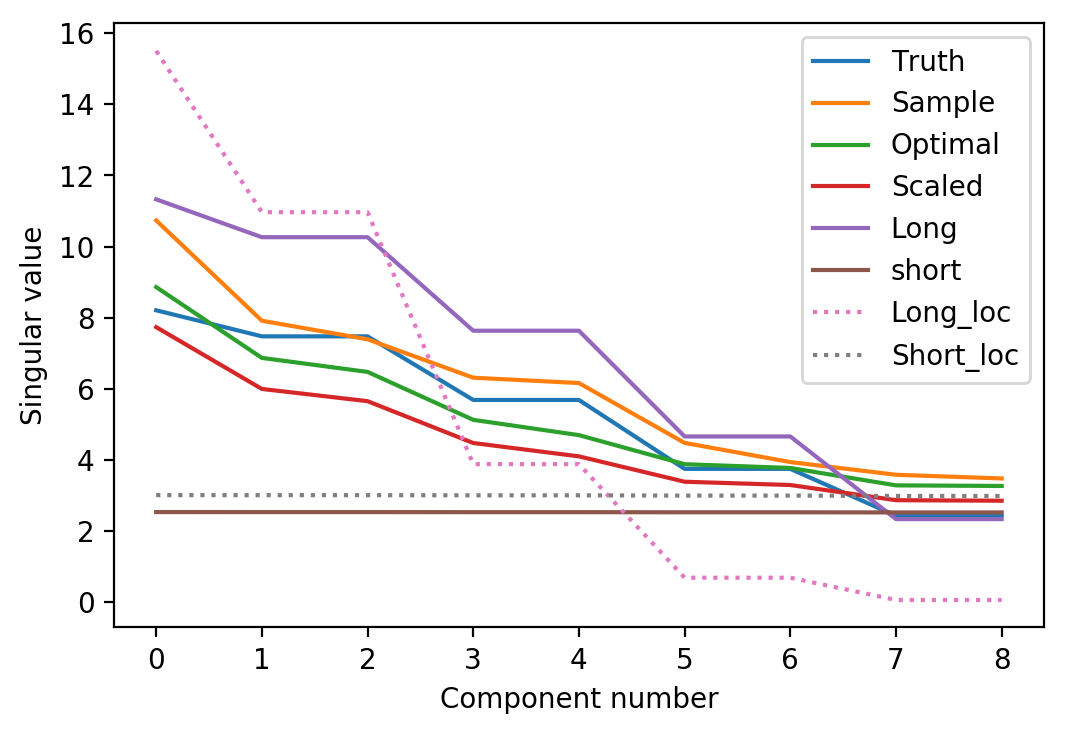

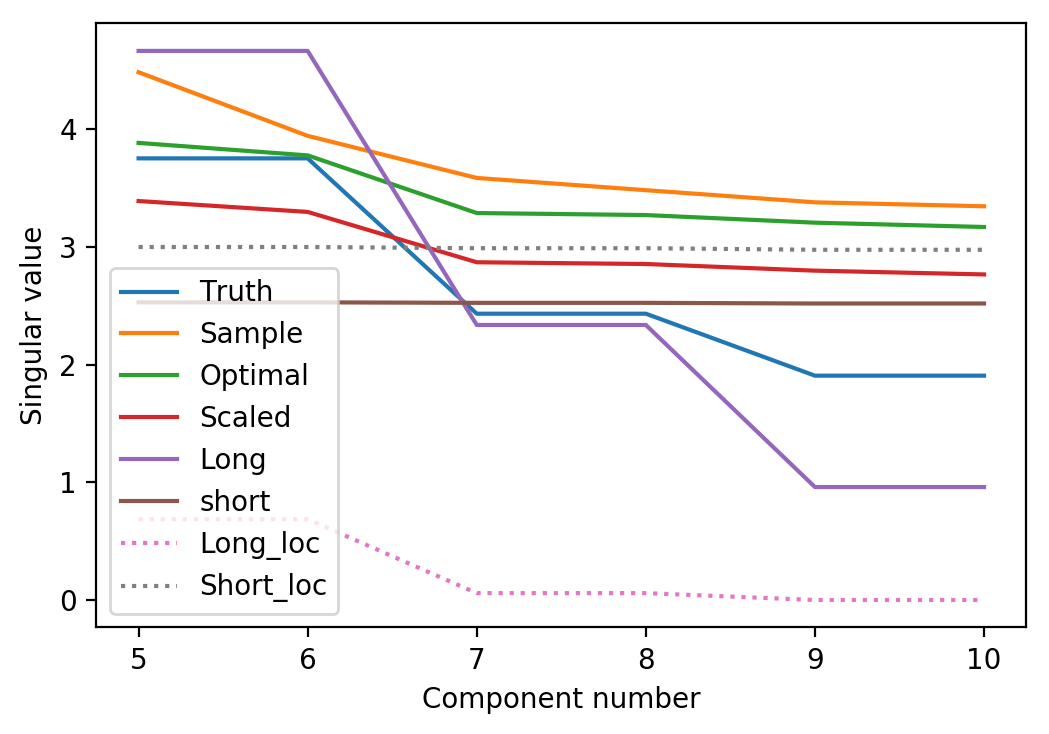

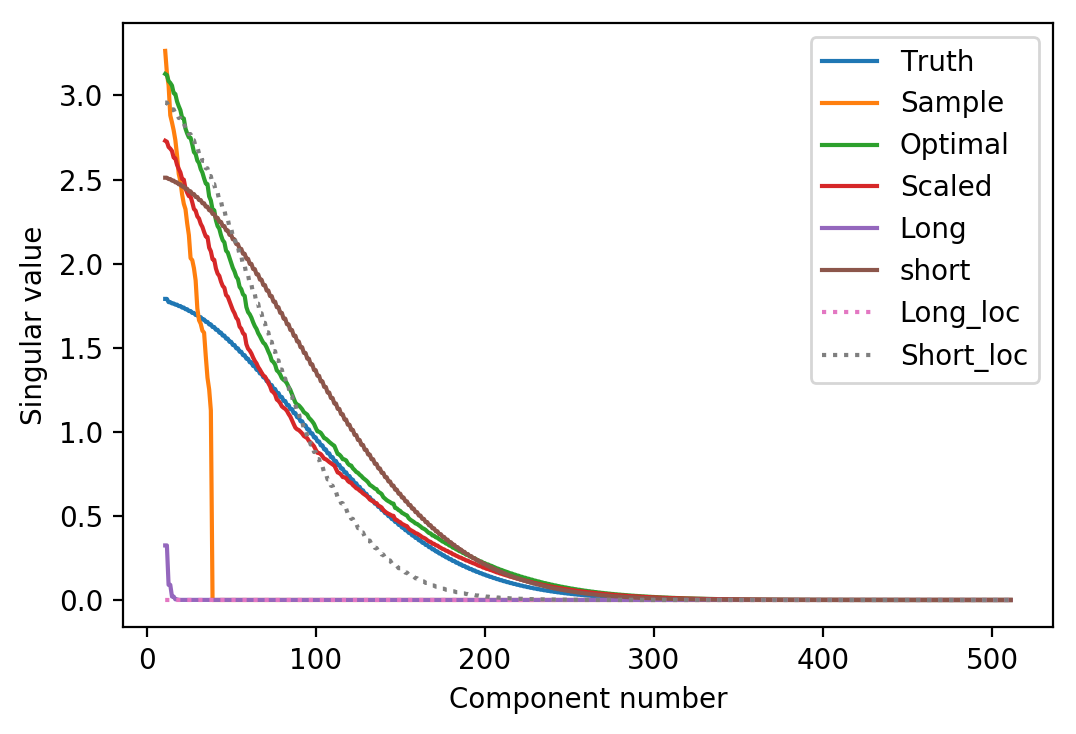

In [232]:
dpi = 200
x_sig = np.arange(S.diagonal().size)
x_sig[:this_total_sig],


opt_sum = opt_s_array[:this_total_sig].sum()
sample_sum = S_sample.diagonal()[:this_total_sig].sum()
plt.figure(dpi=dpi)
plt.plot(x_sig[:this_total_sig],
         S.diagonal()[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         S_sample.diagonal()[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         opt_s_array[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         opt_s_array_scaled[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         S_l.diagonal()[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         S_s.diagonal()[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         S_loc_l.diagonal()[:this_total_sig], ':')
plt.plot(x_sig[:this_total_sig],
         S_loc_s.diagonal()[:this_total_sig], ':')
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short',
    'Long_loc',
    'Short_loc'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

this_min_sig = 0
this_max_sig = 5
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_loc_l.diagonal()[this_min_sig:this_max_sig], ':')
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_loc_s.diagonal()[this_min_sig:this_max_sig], ':')
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short',
    'Long_loc',
    'Short_loc'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

this_min_sig = 0
this_max_sig = sig_array.sum()
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_loc_l.diagonal()[this_min_sig:this_max_sig], ':')
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_loc_s.diagonal()[this_min_sig:this_max_sig], ':')
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short',
    'Long_loc',
    'Short_loc'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

this_min_sig = 5
this_max_sig = 11
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_loc_l.diagonal()[this_min_sig:this_max_sig], ':')
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_loc_s.diagonal()[this_min_sig:this_max_sig], ':')
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short',
    'Long_loc',
    'Short_loc'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

this_min_sig = 11
this_max_sig = est_rank
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_loc_l.diagonal()[this_min_sig:this_max_sig], ':')
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_loc_s.diagonal()[this_min_sig:this_max_sig], ':')
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short',
    'Long_loc',
    'Short_loc'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

In [233]:
this_slice = slice(1, est_rank + 1)
print(np.sum(S.diagonal()[this_slice]**2))
print(np.sum(S_sample.diagonal()[this_slice]**2))
print(np.sum(opt_s_array[this_slice]**2))
scale = (
    np.sum(S_sample.diagonal()[this_slice]**2)
    / np.sum(opt_s_array[this_slice]**2))

opt_s_array_scaled = opt_s_array.copy()
opt_s_array_scaled[this_slice] = np.sqrt(opt_s_array[this_slice]**2 * scale)
# scale = ((sample_reconstruct @ H.T).diagonal().sum()
#          / (opt_reconstruct @ H.T).diagonal().sum())
# opt_s_array_scaled = opt_s_array[:total_sig] * scale
# opt_s_array_scaled = S.diagonal()[:total_sig]
print(scale)
print(np.sum(opt_s_array_scaled**2))

444.6218319779182
421.7420572463508
626.1935674491608
0.67350110120796
500.2504479914203


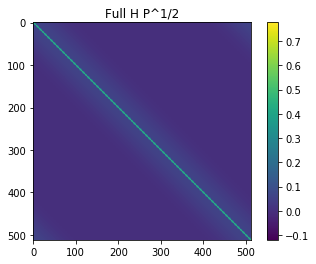

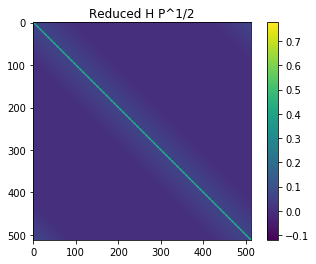

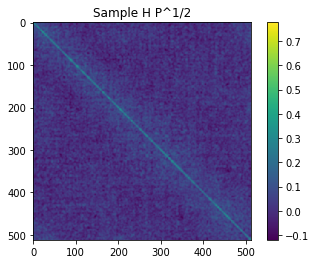

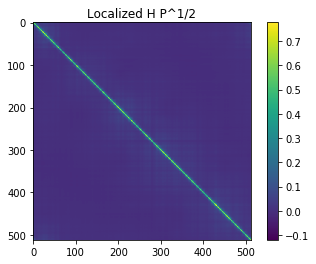

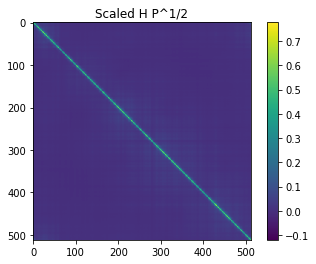

In [234]:
this_total_sig = est_rank
truth = H @ P_sqrt
true_reconstruct = (
    U[:, :this_total_sig]
    @ S[:this_total_sig, :this_total_sig]
    @ VT[:this_total_sig, :])
sample_reconstruct = (
    U_sample[:, :this_total_sig]
    @ S_sample[:this_total_sig, :this_total_sig]
    @ VT_sample[:this_total_sig, :])
# opt_reconstruct = (
#     opt_U_array[:, :total_sig]
#     @ S_sample[:total_sig, :total_sig]
#     @ opt_V_array[:, :total_sig].T)
opt_reconstruct = (
    opt_U_array[:, :this_total_sig]
    @ np.diag(opt_s_array[:this_total_sig])
    @ opt_V_array[:, :this_total_sig].T)

opt_reconstruct_scaled = (
    opt_U_array[:, :this_total_sig]
    @ np.diag(opt_s_array_scaled[:this_total_sig])
    @ opt_V_array[:, :this_total_sig].T)


vmin = np.min([
    truth.min(),
    true_reconstruct.min(),
    sample_reconstruct.min(),
    opt_reconstruct.min(),
    opt_reconstruct_scaled.min()
])
vmax = np.max([
    truth.max(),
    true_reconstruct.max(),
    sample_reconstruct.max(),
    opt_reconstruct.max(),
    opt_reconstruct_scaled.max()
])
imshow(truth,
       title='Full H P^1/2',
       vmin=vmin, vmax=vmax)
imshow(true_reconstruct,
       title='Reduced H P^1/2',
       vmin=vmin, vmax=vmax)
imshow(sample_reconstruct,
       title='Sample H P^1/2',
       vmin=vmin, vmax=vmax)
imshow(opt_reconstruct,
       title='Localized H P^1/2',
       vmin=vmin, vmax=vmax)
imshow(opt_reconstruct_scaled,
       title='Scaled H P^1/2',
       vmin=vmin, vmax=vmax)

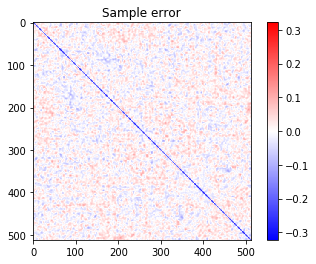

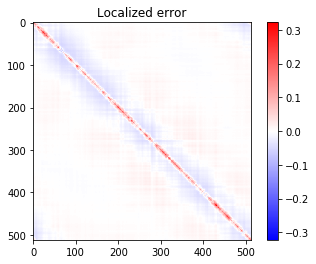

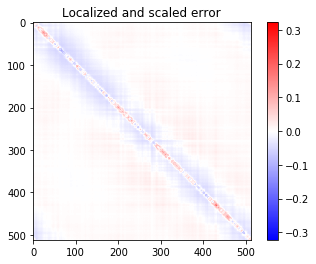

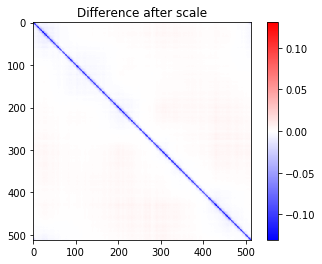

In [235]:
error_sample = (sample_reconstruct
                - true_reconstruct)
error_opt = (opt_reconstruct
             - true_reconstruct)
error_opt_scaled = (opt_reconstruct_scaled
                    - true_reconstruct)
diff_scaled = (opt_reconstruct_scaled
               - opt_reconstruct)

vmax = np.max([
    np.abs(error_sample).max(),
    np.abs(error_opt).max(),
    np.abs(error_opt_scaled).max()
])

imshow(error_sample,
       title='Sample error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')
imshow(error_opt,
       title='Localized error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')
imshow(error_opt_scaled,
       title='Localized and scaled error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')

vmax = np.abs(diff_scaled).max()
imshow(diff_scaled,
       title='Difference after scale',
       vmax=vmax,
       vmin=-vmax,
       cmap='bwr')

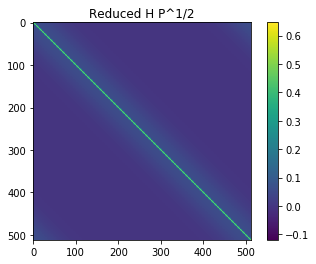

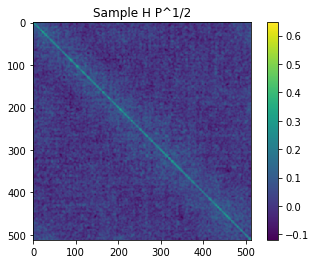

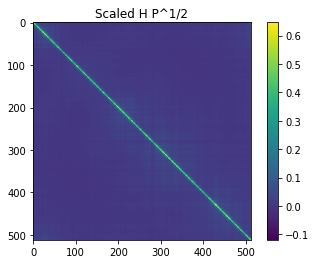

In [236]:
vmin = np.min([
    true_reconstruct.min(),
    sample_reconstruct.min(),
    opt_reconstruct_scaled.min()
])
vmax = np.max([
    true_reconstruct.max(),
    sample_reconstruct.max(),
    opt_reconstruct_scaled.max()
])

imshow(true_reconstruct,
       title='Reduced H P^1/2',
       vmin=vmin, vmax=vmax)
imshow(sample_reconstruct,
       title='Sample H P^1/2',
       vmin=vmin, vmax=vmax)
imshow(opt_reconstruct_scaled,
       title='Scaled H P^1/2',
       vmin=vmin, vmax=vmax)

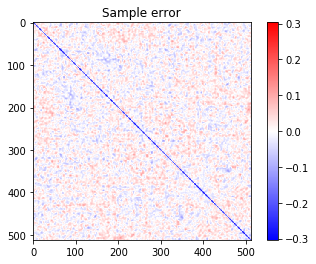

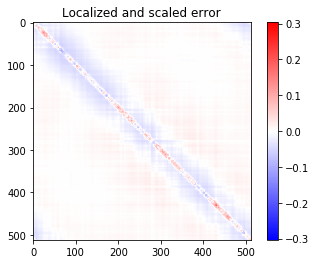

In [237]:
vmax = np.max([
    np.abs(error_sample).max(),
    np.abs(error_opt_scaled).max()
])

imshow(error_sample,
       title='Sample error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')
imshow(error_opt_scaled,
       title='Localized and scaled error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')

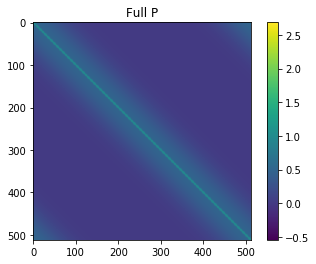

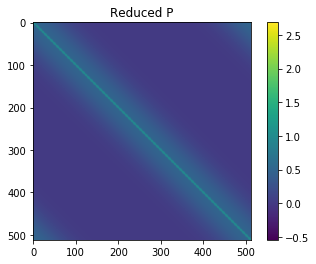

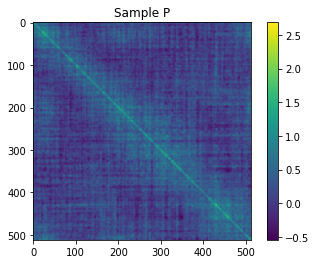

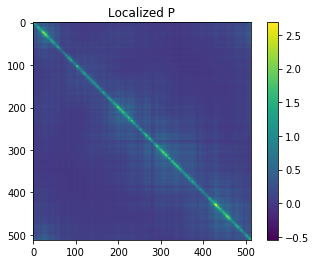

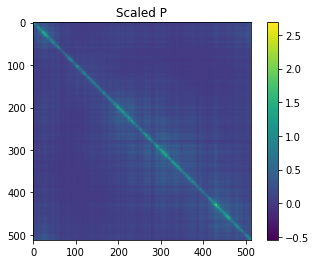

In [238]:
this_total_sig = est_rank
truth = H @ P_sqrt
truth = truth @ truth
true_reconstruct = (
    U[:, :this_total_sig]
    @ S[:this_total_sig, :this_total_sig]
    @ VT[:this_total_sig, :])
true_reconstruct = true_reconstruct @ true_reconstruct
sample_reconstruct = (
    U_sample[:, :this_total_sig]
    @ S_sample[:this_total_sig, :this_total_sig]
    @ VT_sample[:this_total_sig, :])
sample_reconstruct = sample_reconstruct @ sample_reconstruct
# opt_reconstruct = (
#     opt_U_array[:, :total_sig]
#     @ S_sample[:total_sig, :total_sig]
#     @ opt_V_array[:, :total_sig].T)
opt_reconstruct = (
    opt_U_array[:, :this_total_sig]
    @ np.diag(opt_s_array[:this_total_sig])
    @ opt_V_array[:, :this_total_sig].T)
opt_reconstruct = opt_reconstruct @ opt_reconstruct

opt_reconstruct_scaled = (
    opt_U_array[:, :this_total_sig]
    @ np.diag(opt_s_array_scaled[:this_total_sig])
    @ opt_V_array[:, :this_total_sig].T)
opt_reconstruct_scaled = opt_reconstruct_scaled @ opt_reconstruct_scaled


vmin = np.min([
    truth.min(),
    true_reconstruct.min(),
    sample_reconstruct.min(),
    opt_reconstruct.min(),
    opt_reconstruct_scaled.min()
])
vmax = np.max([
    truth.max(),
    true_reconstruct.max(),
    sample_reconstruct.max(),
    opt_reconstruct.max(),
    opt_reconstruct_scaled.max()
])
imshow(truth,
       title='Full P',
       vmin=vmin, vmax=vmax)
imshow(true_reconstruct,
       title='Reduced P',
       vmin=vmin, vmax=vmax)
imshow(sample_reconstruct,
       title='Sample P',
       vmin=vmin, vmax=vmax)
imshow(opt_reconstruct,
       title='Localized P',
       vmin=vmin, vmax=vmax)
imshow(opt_reconstruct_scaled,
       title='Scaled P',
       vmin=vmin, vmax=vmax)

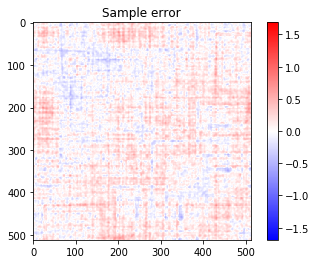

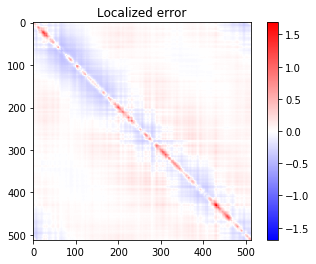

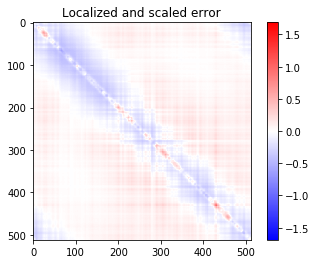

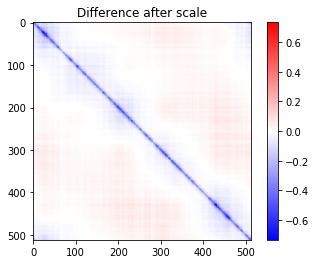

In [239]:
error_sample = (sample_reconstruct
                - true_reconstruct)
error_opt = (opt_reconstruct
             - true_reconstruct)
error_opt_scaled = (opt_reconstruct_scaled
                    - true_reconstruct)
diff_scaled = (opt_reconstruct_scaled
               - opt_reconstruct)

vmax = np.max([
    np.abs(error_sample).max(),
    np.abs(error_opt).max(),
    np.abs(error_opt_scaled).max()
])

imshow(error_sample,
       title='Sample error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')
imshow(error_opt,
       title='Localized error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')
imshow(error_opt_scaled,
       title='Localized and scaled error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')

vmax = np.abs(diff_scaled).max()
imshow(diff_scaled,
       title='Difference after scale',
       vmax=vmax,
       vmin=-vmax,
       cmap='bwr')

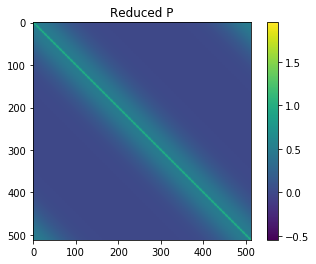

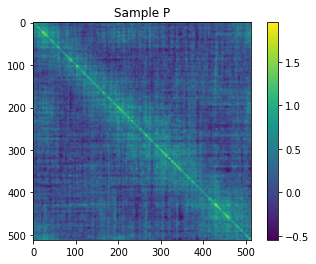

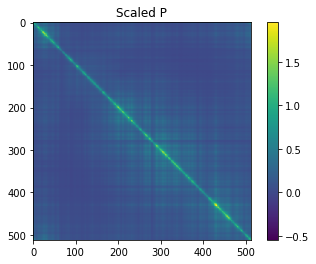

In [240]:
vmin = np.min([
    true_reconstruct.min(),
    sample_reconstruct.min(),
    opt_reconstruct_scaled.min()
])
vmax = np.max([
    true_reconstruct.max(),
    sample_reconstruct.max(),
    opt_reconstruct_scaled.max()
])

imshow(true_reconstruct,
       title='Reduced P',
       vmin=vmin, vmax=vmax)
imshow(sample_reconstruct,
       title='Sample P',
       vmin=vmin, vmax=vmax)
imshow(opt_reconstruct_scaled,
       title='Scaled P',
       vmin=vmin, vmax=vmax)

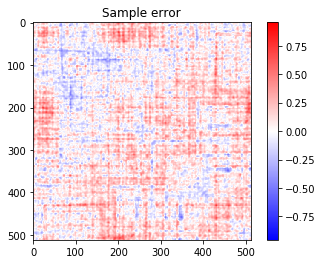

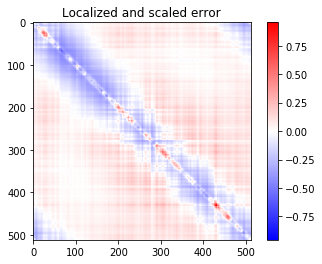

In [241]:
vmax = np.max([
    np.abs(error_sample).max(),
    np.abs(error_opt_scaled).max()
])

imshow(error_sample,
       title='Sample error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')
imshow(error_opt_scaled,
       title='Localized and scaled error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')

Text(0,0.5,'Singular value')

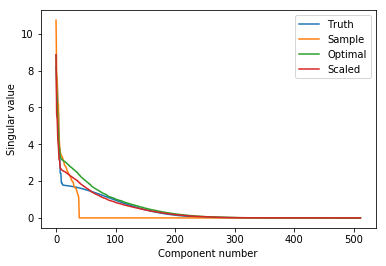

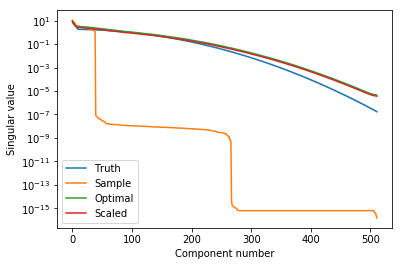

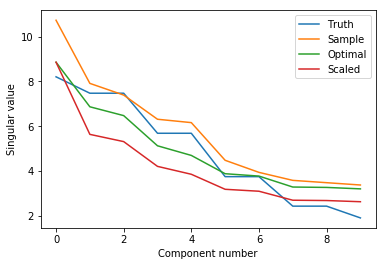

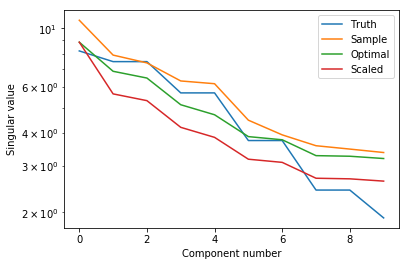

In [242]:
opt_sum = opt_s_array[:this_total_sig].sum()
sample_sum = S_sample.diagonal()[:this_total_sig].sum()
plt.figure()
plt.plot(S.diagonal()[:this_total_sig])
plt.plot(S_sample.diagonal()[:this_total_sig])
plt.plot(opt_s_array[:this_total_sig])
plt.plot(opt_s_array_scaled[:this_total_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

plt.figure()
plt.semilogy(S.diagonal()[:this_total_sig])
plt.semilogy(S_sample.diagonal()[:this_total_sig])
plt.semilogy(opt_s_array[:this_total_sig])
plt.semilogy(opt_s_array_scaled[:this_total_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')


this_max_sig = 10
plt.figure()
plt.plot(S.diagonal()[:this_max_sig])
plt.plot(S_sample.diagonal()[:this_max_sig])
plt.plot(opt_s_array[:this_max_sig])
plt.plot(opt_s_array_scaled[:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

plt.figure()
plt.semilogy(S.diagonal()[:this_max_sig])
plt.semilogy(S_sample.diagonal()[:this_max_sig])
plt.semilogy(opt_s_array[:this_max_sig])
plt.semilogy(opt_s_array_scaled[:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

Text(0,0.5,'Singular value')

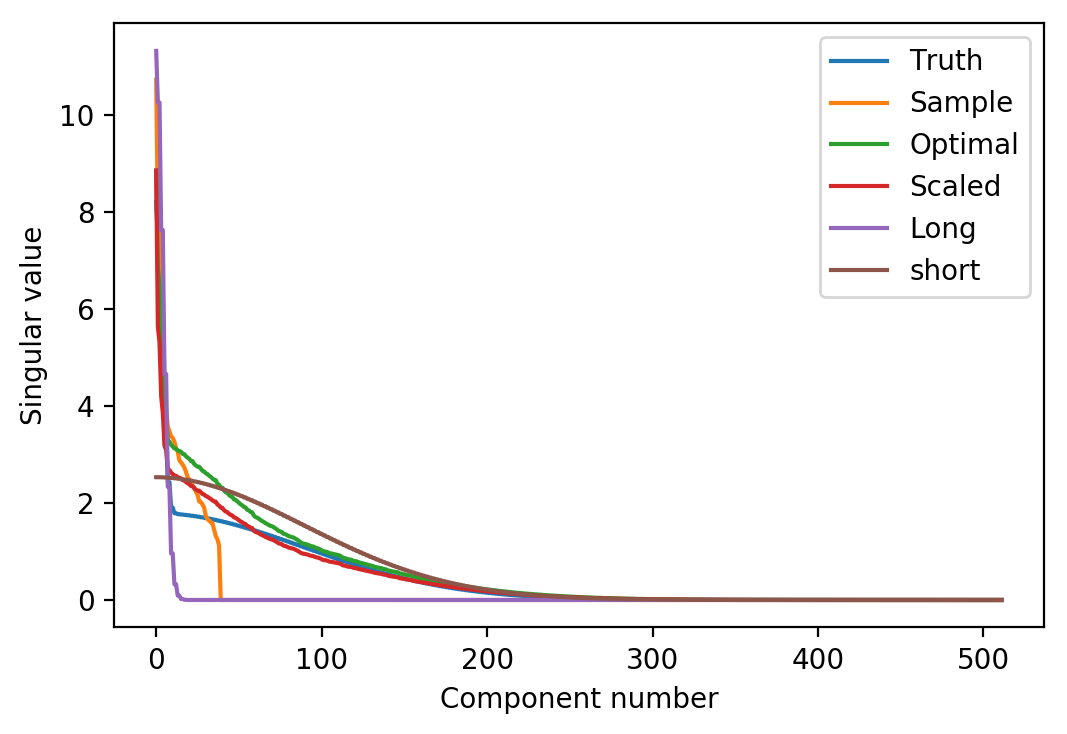

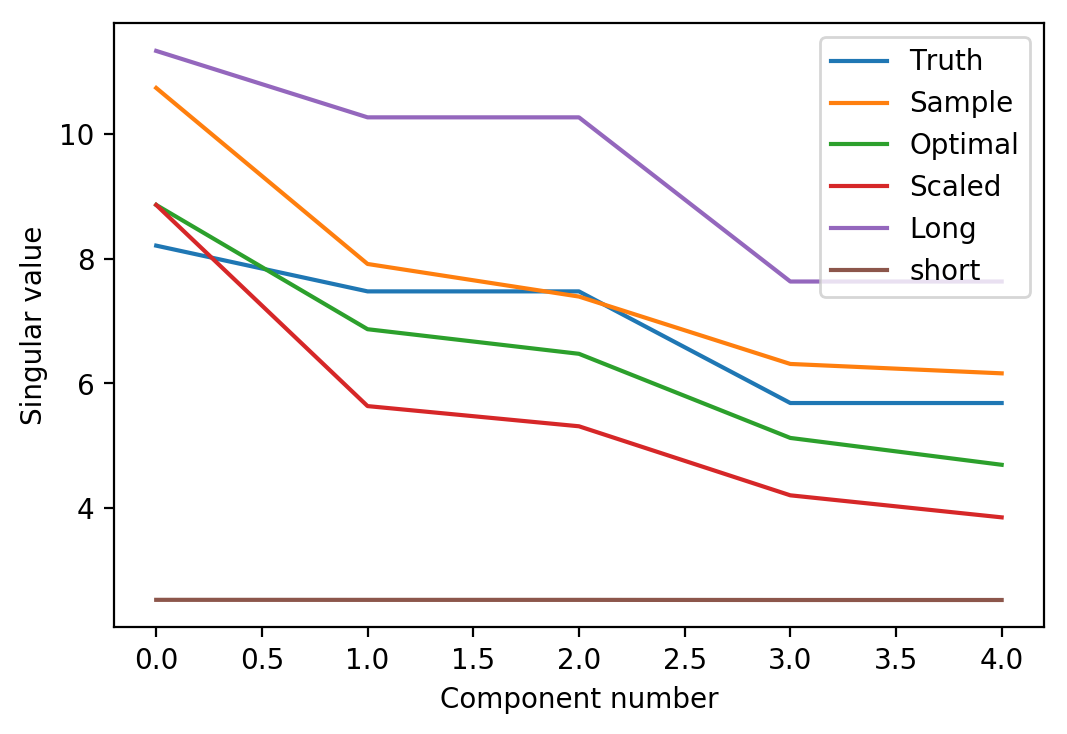

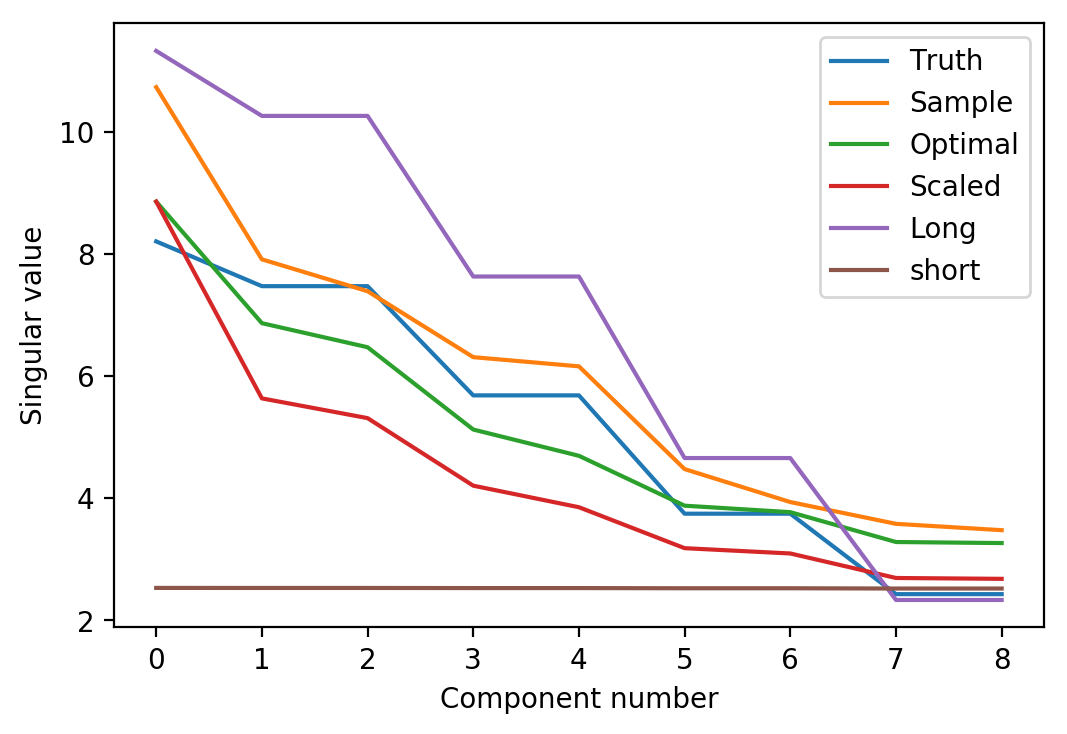

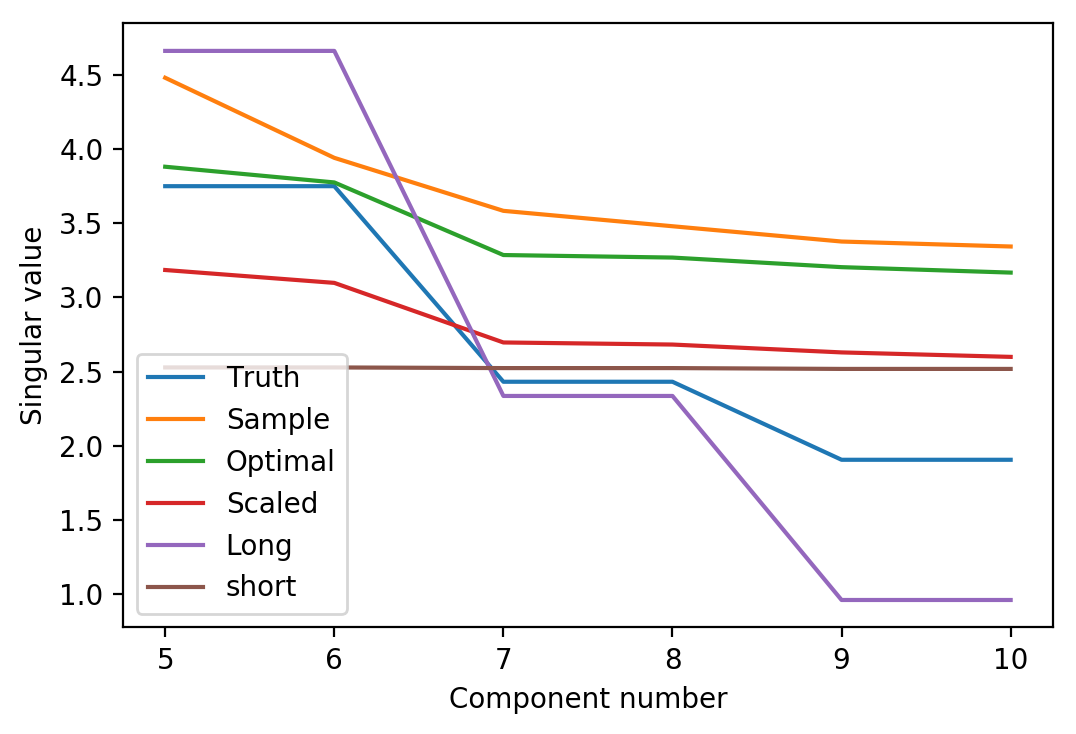

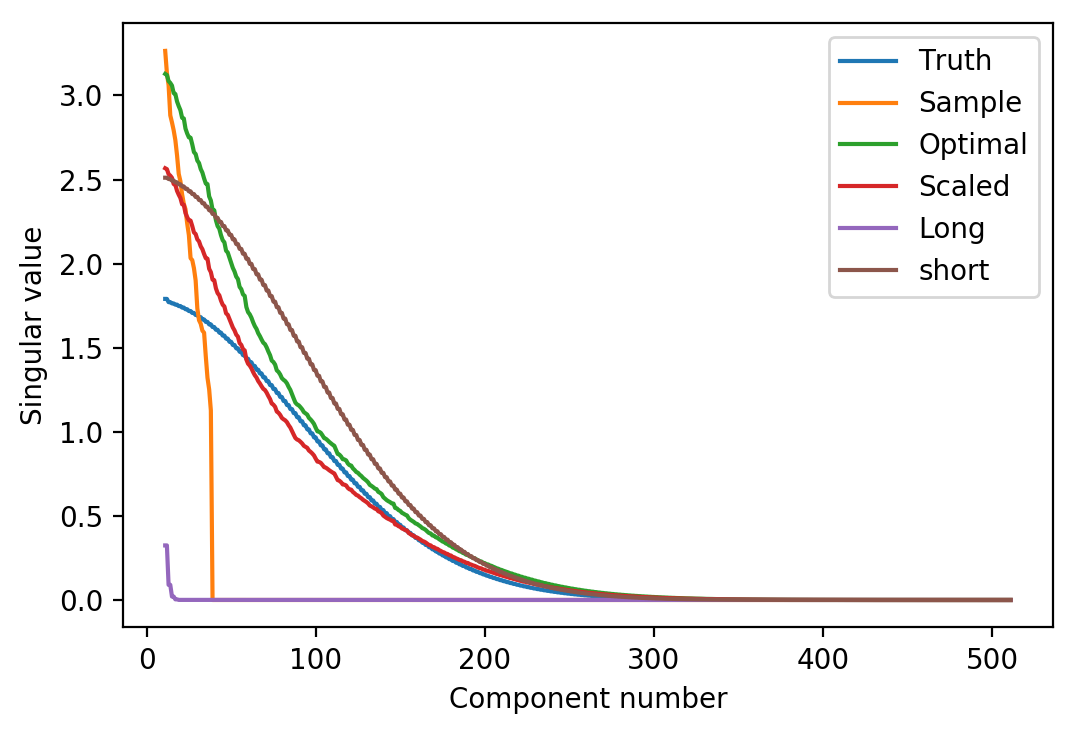

In [243]:
dpi = 200
x_sig = np.arange(S.diagonal().size)
x_sig[:this_total_sig],


opt_sum = opt_s_array[:this_total_sig].sum()
sample_sum = S_sample.diagonal()[:this_total_sig].sum()
plt.figure(dpi=dpi)
plt.plot(x_sig[:this_total_sig],
         S.diagonal()[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         S_sample.diagonal()[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         opt_s_array[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         opt_s_array_scaled[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         S_l.diagonal()[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         S_s.diagonal()[:this_total_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[:this_total_sig],
#          S.diagonal()[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          S_sample.diagonal()[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          opt_s_array[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          opt_s_array_scaled[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          S_l.diagonal()[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          S_s.diagonal()[:this_total_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')

this_min_sig = 0
this_max_sig = 5
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

this_min_sig = 0
this_max_sig = sig_array.sum()
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_sample.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array_scaled[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_l.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_s.diagonal()[this_min_sig:this_max_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')

this_min_sig = 5
this_max_sig = 11
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_sample.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array_scaled[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_l.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_s.diagonal()[this_min_sig:this_max_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')

this_min_sig = 11
this_max_sig = est_rank
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_sample.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array_scaled[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_l.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_s.diagonal()[this_min_sig:this_max_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')

In [201]:
this_slice = slice(1, est_rank + 1)
print(np.sum(S.diagonal()[this_slice]**2))
print(np.sum(S_sample.diagonal()[this_slice]**2))
print(np.sum(opt_s_array[this_slice]**2))
scale = (
    np.sum(S_sample.diagonal()[this_slice]**2)
    / np.sum(opt_s_array[this_slice]**2))

opt_s_array_scaled = opt_s_array.copy()
opt_s_array_scaled[this_slice] = np.sqrt(opt_s_array[this_slice]**2 * scale)
# scale = ((sample_reconstruct @ H.T).diagonal().sum()
#          / (opt_reconstruct @ H.T).diagonal().sum())
# opt_s_array_scaled = opt_s_array[:total_sig] * scale
# opt_s_array_scaled = S.diagonal()[:total_sig]
print(scale)
print(np.sum(opt_s_array_scaled**2))

444.21436651345095
421.7420572463508
625.0948080307217
0.6746849467123127
500.25044799142034


In [261]:
sig_array

array([1, 2, 2, 2, 2])

In [262]:
opt_rho_array

array([0.18728318, 0.07336053, 0.03145072, 0.01603297, 0.01036109])

In [247]:
print(np.sum(S.diagonal()**2))
print(np.sum(S_sample.diagonal()**2))
print(np.sum(opt_s_array**2))
opt_s_array_scaled = np.sqrt(0.5*(opt_s_array**2 + S_loc_l.diagonal()**2))

for sig_count, sig_num in sig_array:
    this_rho = 
opt_s_array_scaled = np.sqrt(0.5*(opt_s_array**2 + S_loc_l.diagonal()**2))
print(np.sum(opt_s_array_scaled**2))

511.99999999999943
536.9854457528622
704.7019581942301
608.3509790971151


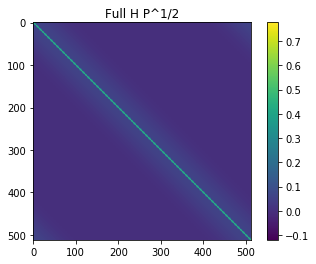

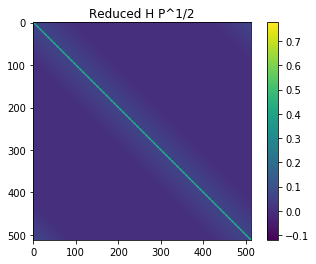

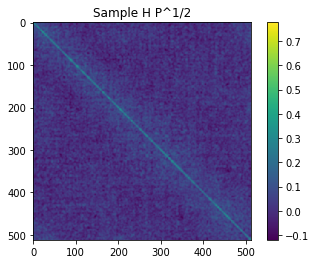

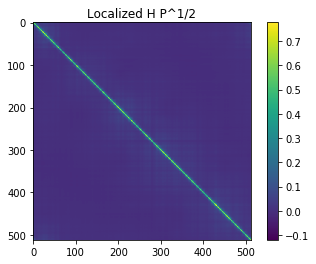

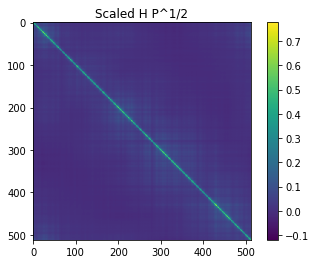

In [248]:
this_total_sig = est_rank
truth = H @ P_sqrt
true_reconstruct = (
    U[:, :this_total_sig]
    @ S[:this_total_sig, :this_total_sig]
    @ VT[:this_total_sig, :])
sample_reconstruct = (
    U_sample[:, :this_total_sig]
    @ S_sample[:this_total_sig, :this_total_sig]
    @ VT_sample[:this_total_sig, :])
# opt_reconstruct = (
#     opt_U_array[:, :total_sig]
#     @ S_sample[:total_sig, :total_sig]
#     @ opt_V_array[:, :total_sig].T)
opt_reconstruct = (
    opt_U_array[:, :this_total_sig]
    @ np.diag(opt_s_array[:this_total_sig])
    @ opt_V_array[:, :this_total_sig].T)

opt_reconstruct_scaled = (
    opt_U_array[:, :this_total_sig]
    @ np.diag(opt_s_array_scaled[:this_total_sig])
    @ opt_V_array[:, :this_total_sig].T)


vmin = np.min([
    truth.min(),
    true_reconstruct.min(),
    sample_reconstruct.min(),
    opt_reconstruct.min(),
    opt_reconstruct_scaled.min()
])
vmax = np.max([
    truth.max(),
    true_reconstruct.max(),
    sample_reconstruct.max(),
    opt_reconstruct.max(),
    opt_reconstruct_scaled.max()
])
imshow(truth,
       title='Full H P^1/2',
       vmin=vmin, vmax=vmax)
imshow(true_reconstruct,
       title='Reduced H P^1/2',
       vmin=vmin, vmax=vmax)
imshow(sample_reconstruct,
       title='Sample H P^1/2',
       vmin=vmin, vmax=vmax)
imshow(opt_reconstruct,
       title='Localized H P^1/2',
       vmin=vmin, vmax=vmax)
imshow(opt_reconstruct_scaled,
       title='Scaled H P^1/2',
       vmin=vmin, vmax=vmax)

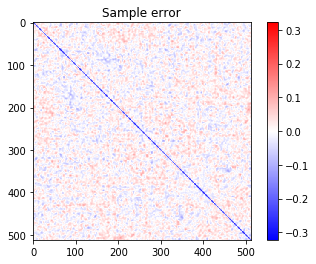

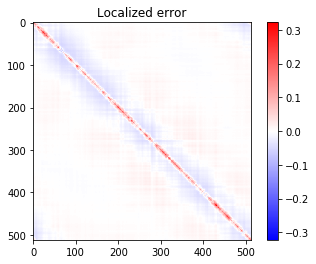

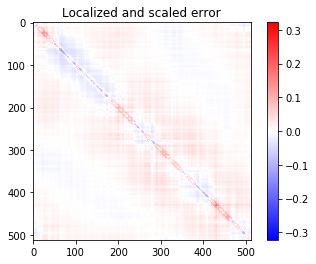

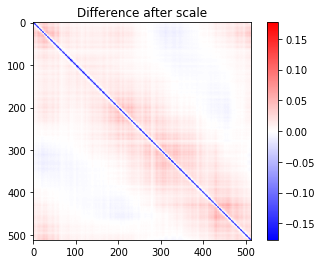

In [249]:
error_sample = (sample_reconstruct
                - true_reconstruct)
error_opt = (opt_reconstruct
             - true_reconstruct)
error_opt_scaled = (opt_reconstruct_scaled
                    - true_reconstruct)
diff_scaled = (opt_reconstruct_scaled
               - opt_reconstruct)

vmax = np.max([
    np.abs(error_sample).max(),
    np.abs(error_opt).max(),
    np.abs(error_opt_scaled).max()
])

imshow(error_sample,
       title='Sample error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')
imshow(error_opt,
       title='Localized error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')
imshow(error_opt_scaled,
       title='Localized and scaled error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')

vmax = np.abs(diff_scaled).max()
imshow(diff_scaled,
       title='Difference after scale',
       vmax=vmax,
       vmin=-vmax,
       cmap='bwr')

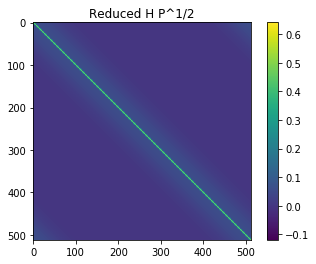

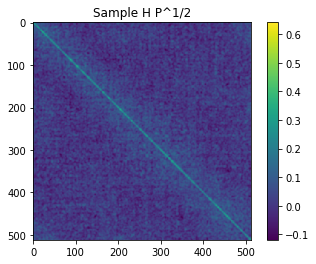

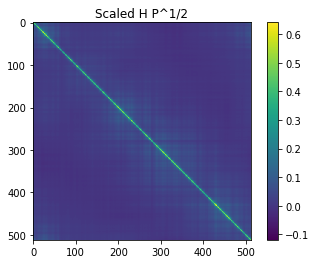

In [250]:
vmin = np.min([
    true_reconstruct.min(),
    sample_reconstruct.min(),
    opt_reconstruct_scaled.min()
])
vmax = np.max([
    true_reconstruct.max(),
    sample_reconstruct.max(),
    opt_reconstruct_scaled.max()
])

imshow(true_reconstruct,
       title='Reduced H P^1/2',
       vmin=vmin, vmax=vmax)
imshow(sample_reconstruct,
       title='Sample H P^1/2',
       vmin=vmin, vmax=vmax)
imshow(opt_reconstruct_scaled,
       title='Scaled H P^1/2',
       vmin=vmin, vmax=vmax)

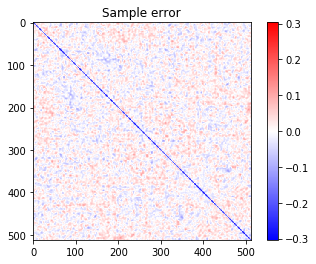

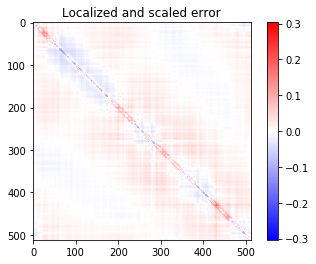

In [251]:
vmax = np.max([
    np.abs(error_sample).max(),
    np.abs(error_opt_scaled).max()
])

imshow(error_sample,
       title='Sample error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')
imshow(error_opt_scaled,
       title='Localized and scaled error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')

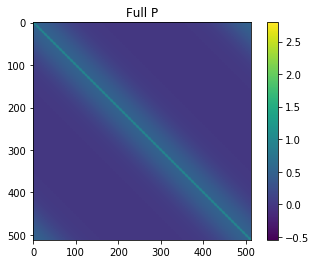

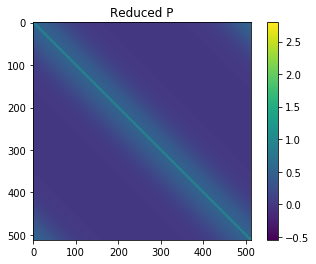

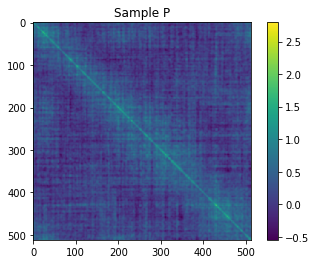

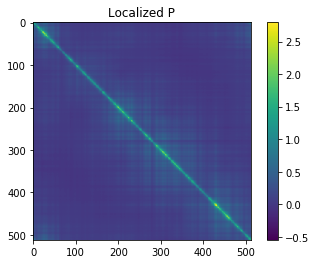

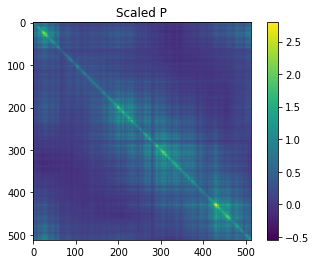

In [252]:
this_total_sig = est_rank
truth = H @ P_sqrt
truth = truth @ truth
true_reconstruct = (
    U[:, :this_total_sig]
    @ S[:this_total_sig, :this_total_sig]
    @ VT[:this_total_sig, :])
true_reconstruct = true_reconstruct @ true_reconstruct
sample_reconstruct = (
    U_sample[:, :this_total_sig]
    @ S_sample[:this_total_sig, :this_total_sig]
    @ VT_sample[:this_total_sig, :])
sample_reconstruct = sample_reconstruct @ sample_reconstruct
# opt_reconstruct = (
#     opt_U_array[:, :total_sig]
#     @ S_sample[:total_sig, :total_sig]
#     @ opt_V_array[:, :total_sig].T)
opt_reconstruct = (
    opt_U_array[:, :this_total_sig]
    @ np.diag(opt_s_array[:this_total_sig])
    @ opt_V_array[:, :this_total_sig].T)
opt_reconstruct = opt_reconstruct @ opt_reconstruct

opt_reconstruct_scaled = (
    opt_U_array[:, :this_total_sig]
    @ np.diag(opt_s_array_scaled[:this_total_sig])
    @ opt_V_array[:, :this_total_sig].T)
opt_reconstruct_scaled = opt_reconstruct_scaled @ opt_reconstruct_scaled


vmin = np.min([
    truth.min(),
    true_reconstruct.min(),
    sample_reconstruct.min(),
    opt_reconstruct.min(),
    opt_reconstruct_scaled.min()
])
vmax = np.max([
    truth.max(),
    true_reconstruct.max(),
    sample_reconstruct.max(),
    opt_reconstruct.max(),
    opt_reconstruct_scaled.max()
])
imshow(truth,
       title='Full P',
       vmin=vmin, vmax=vmax)
imshow(true_reconstruct,
       title='Reduced P',
       vmin=vmin, vmax=vmax)
imshow(sample_reconstruct,
       title='Sample P',
       vmin=vmin, vmax=vmax)
imshow(opt_reconstruct,
       title='Localized P',
       vmin=vmin, vmax=vmax)
imshow(opt_reconstruct_scaled,
       title='Scaled P',
       vmin=vmin, vmax=vmax)

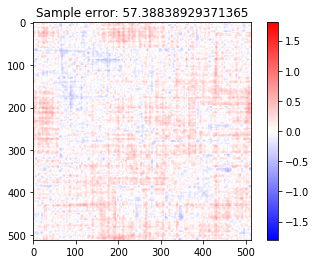

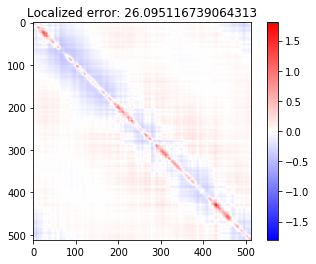

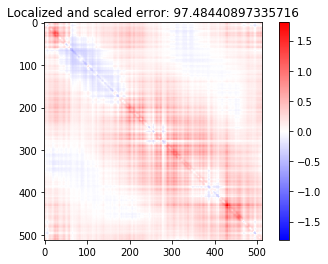

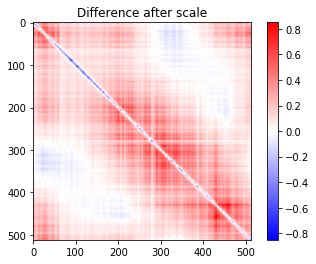

In [260]:
error_sample = (sample_reconstruct
                - true_reconstruct)
error_opt = (opt_reconstruct
             - true_reconstruct)
error_opt_scaled = (opt_reconstruct_scaled
                    - true_reconstruct)
diff_scaled = (opt_reconstruct_scaled
               - opt_reconstruct)

vmax = np.max([
    np.abs(error_sample).max(),
    np.abs(error_opt).max(),
    np.abs(error_opt_scaled).max()
])

L2 = np.linalg.norm(error_sample, ord=2)
imshow(error_sample,
       title=f'Sample error: {L2}',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')
L2 = np.linalg.norm(error_opt, ord=2)
imshow(error_opt,
       title=f'Localized error: {L2}',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')
L2 = np.linalg.norm(error_opt_scaled, ord=2)
imshow(error_opt_scaled,
       title=f'Localized and scaled error: {L2}',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')

vmax = np.abs(diff_scaled).max()
imshow(diff_scaled,
       title='Difference after scale',
       vmax=vmax,
       vmin=-vmax,
       cmap='bwr')

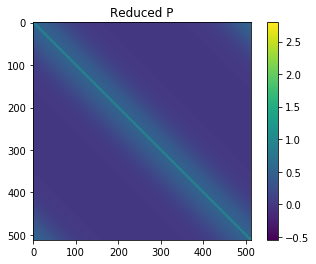

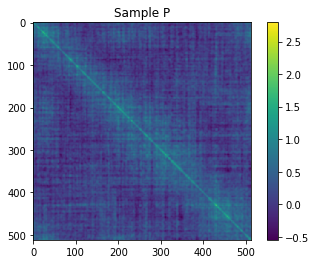

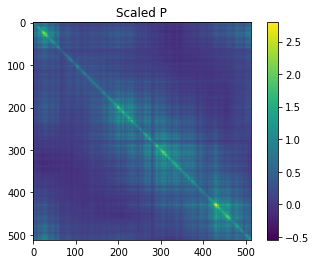

In [254]:
vmin = np.min([
    true_reconstruct.min(),
    sample_reconstruct.min(),
    opt_reconstruct_scaled.min()
])
vmax = np.max([
    true_reconstruct.max(),
    sample_reconstruct.max(),
    opt_reconstruct_scaled.max()
])

imshow(true_reconstruct,
       title='Reduced P',
       vmin=vmin, vmax=vmax)
imshow(sample_reconstruct,
       title='Sample P',
       vmin=vmin, vmax=vmax)
imshow(opt_reconstruct_scaled,
       title='Scaled P',
       vmin=vmin, vmax=vmax)

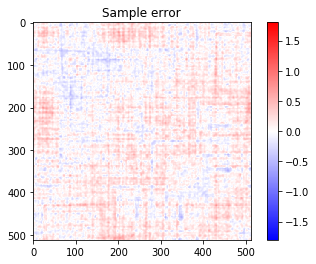

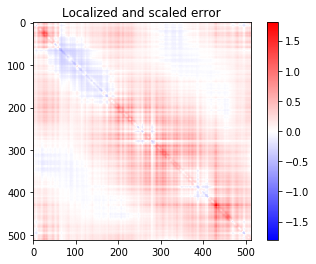

In [255]:
vmax = np.max([
    np.abs(error_sample).max(),
    np.abs(error_opt_scaled).max()
])

imshow(error_sample,
       title='Sample error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')
imshow(error_opt_scaled,
       title='Localized and scaled error',
      vmax=vmax,
      vmin=-vmax,
      cmap='bwr')

Text(0,0.5,'Singular value')

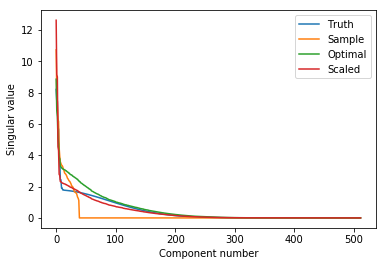

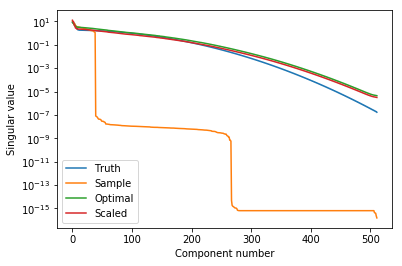

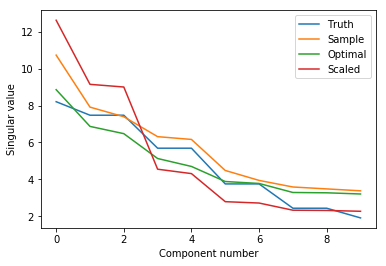

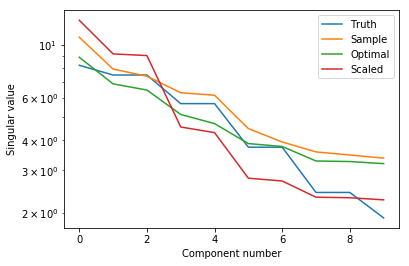

In [256]:
opt_sum = opt_s_array[:this_total_sig].sum()
sample_sum = S_sample.diagonal()[:this_total_sig].sum()
plt.figure()
plt.plot(S.diagonal()[:this_total_sig])
plt.plot(S_sample.diagonal()[:this_total_sig])
plt.plot(opt_s_array[:this_total_sig])
plt.plot(opt_s_array_scaled[:this_total_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

plt.figure()
plt.semilogy(S.diagonal()[:this_total_sig])
plt.semilogy(S_sample.diagonal()[:this_total_sig])
plt.semilogy(opt_s_array[:this_total_sig])
plt.semilogy(opt_s_array_scaled[:this_total_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')


this_max_sig = 10
plt.figure()
plt.plot(S.diagonal()[:this_max_sig])
plt.plot(S_sample.diagonal()[:this_max_sig])
plt.plot(opt_s_array[:this_max_sig])
plt.plot(opt_s_array_scaled[:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

plt.figure()
plt.semilogy(S.diagonal()[:this_max_sig])
plt.semilogy(S_sample.diagonal()[:this_max_sig])
plt.semilogy(opt_s_array[:this_max_sig])
plt.semilogy(opt_s_array_scaled[:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

Text(0,0.5,'Singular value')

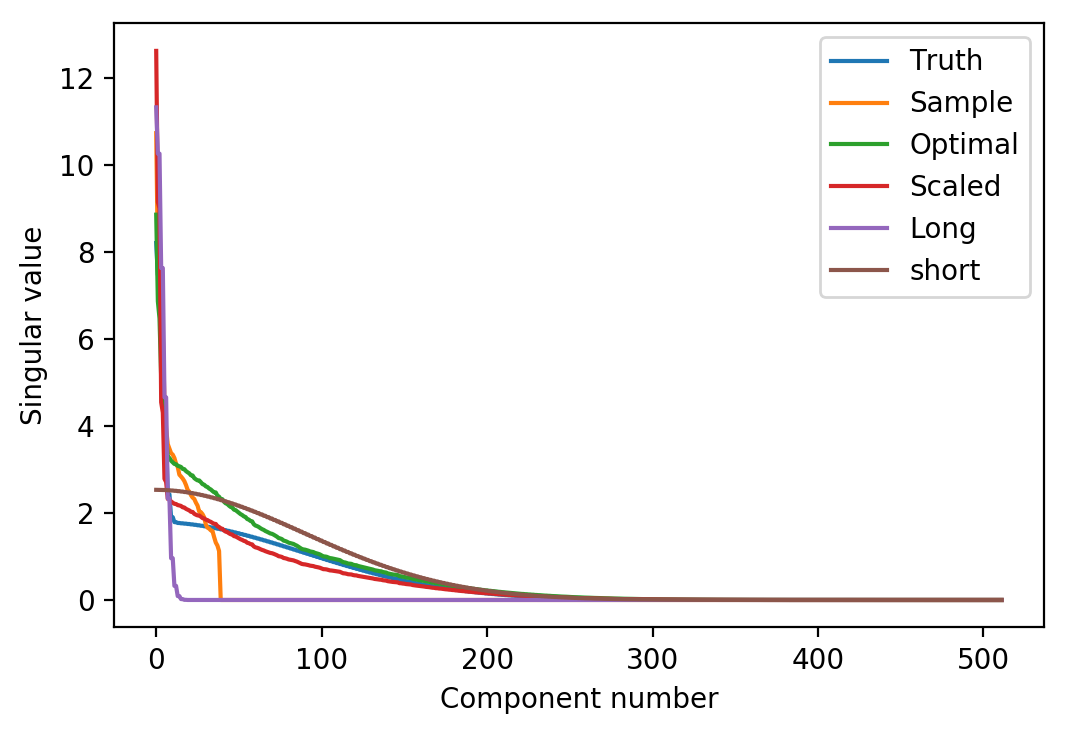

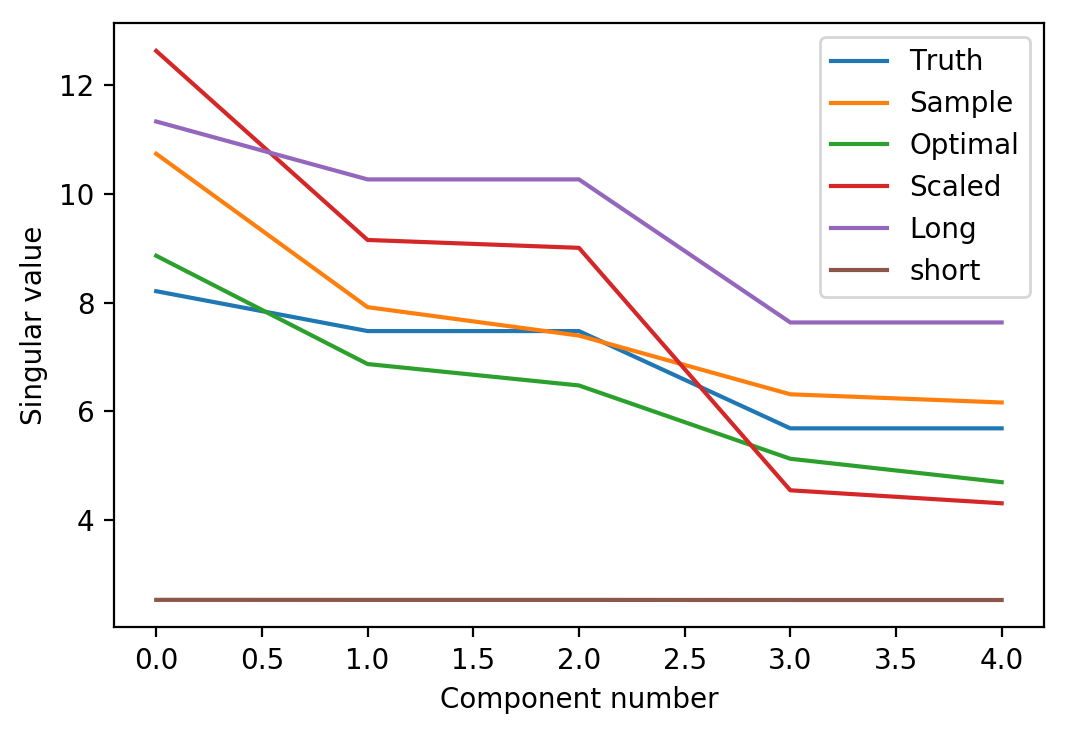

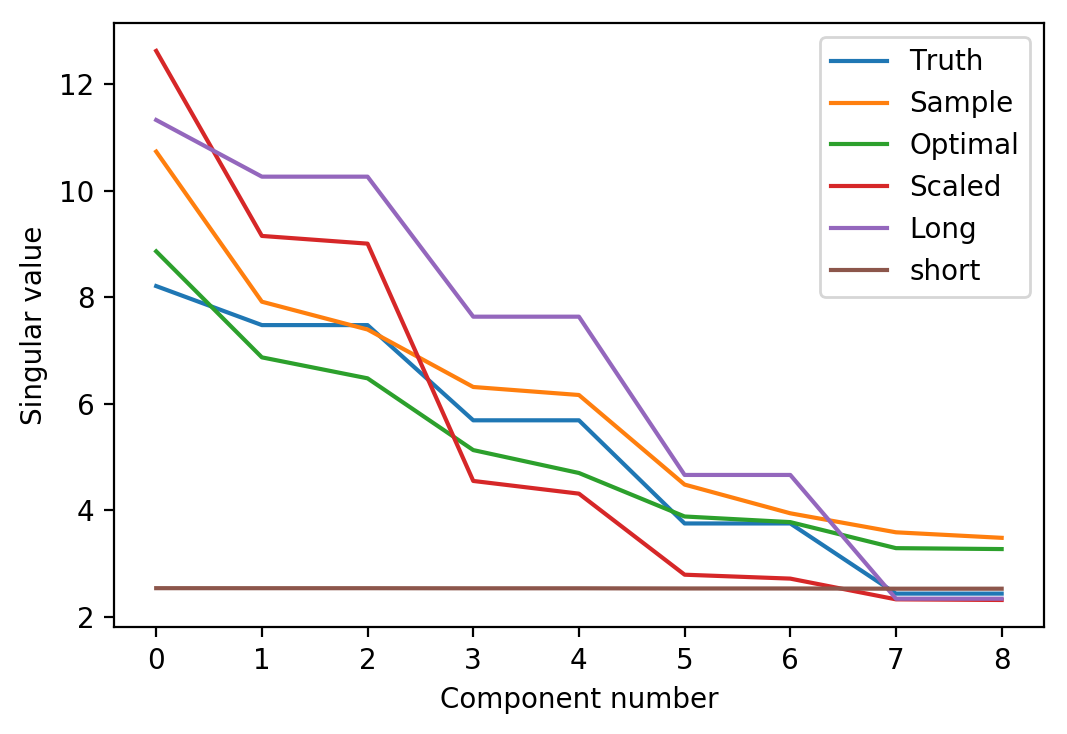

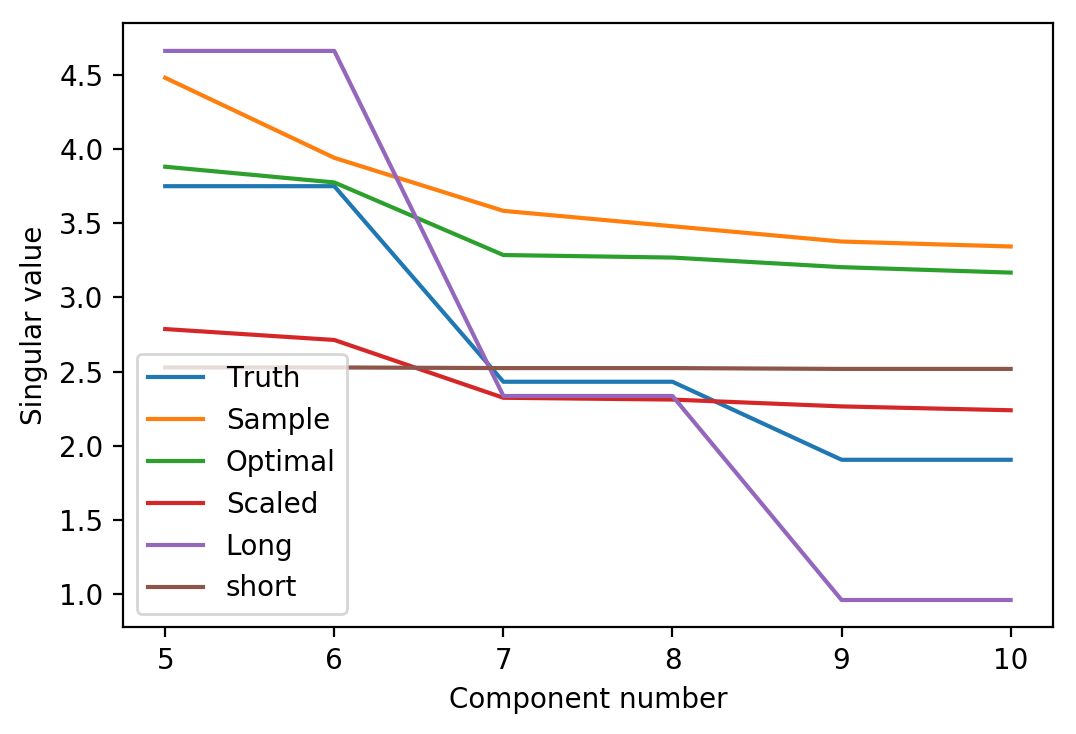

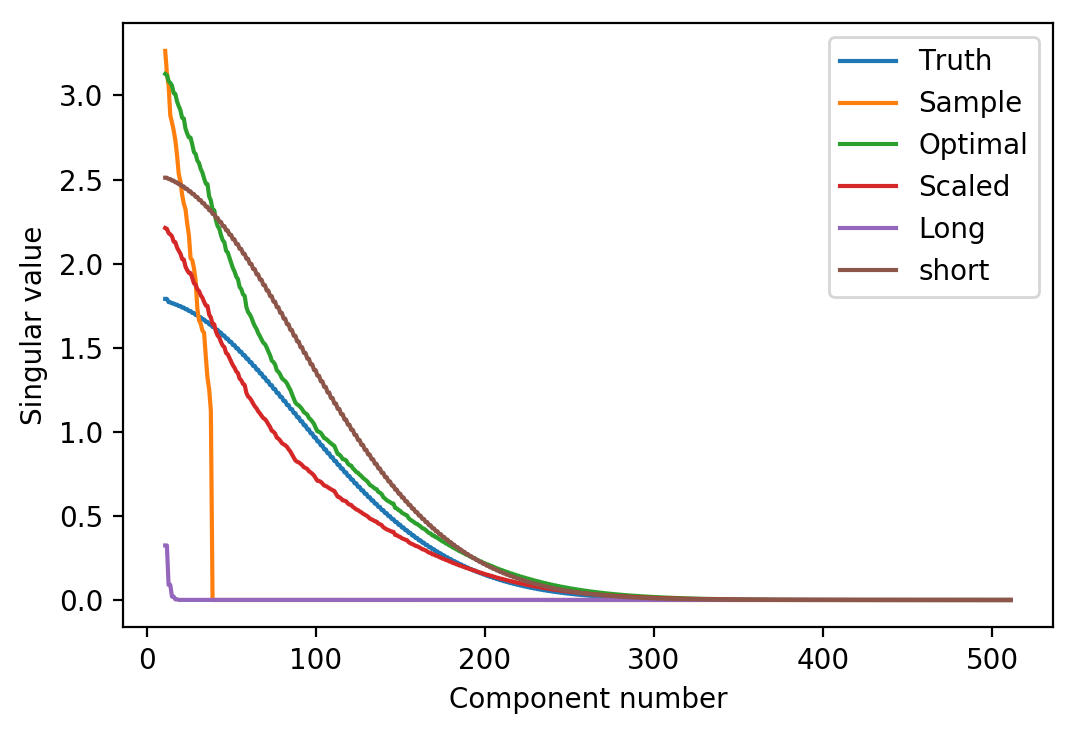

In [257]:
dpi = 200
x_sig = np.arange(S.diagonal().size)
x_sig[:this_total_sig],


opt_sum = opt_s_array[:this_total_sig].sum()
sample_sum = S_sample.diagonal()[:this_total_sig].sum()
plt.figure(dpi=dpi)
plt.plot(x_sig[:this_total_sig],
         S.diagonal()[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         S_sample.diagonal()[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         opt_s_array[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         opt_s_array_scaled[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         S_l.diagonal()[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         S_s.diagonal()[:this_total_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[:this_total_sig],
#          S.diagonal()[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          S_sample.diagonal()[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          opt_s_array[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          opt_s_array_scaled[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          S_l.diagonal()[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          S_s.diagonal()[:this_total_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')

this_min_sig = 0
this_max_sig = 5
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

this_min_sig = 0
this_max_sig = sig_array.sum()
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_sample.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array_scaled[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_l.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_s.diagonal()[this_min_sig:this_max_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')

this_min_sig = 5
this_max_sig = 11
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_sample.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array_scaled[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_l.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_s.diagonal()[this_min_sig:this_max_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')

this_min_sig = 11
this_max_sig = est_rank
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_sample.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array_scaled[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_l.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_s.diagonal()[this_min_sig:this_max_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')

In [ ]:
# rate of 1

Text(0,0.5,'Singular value')

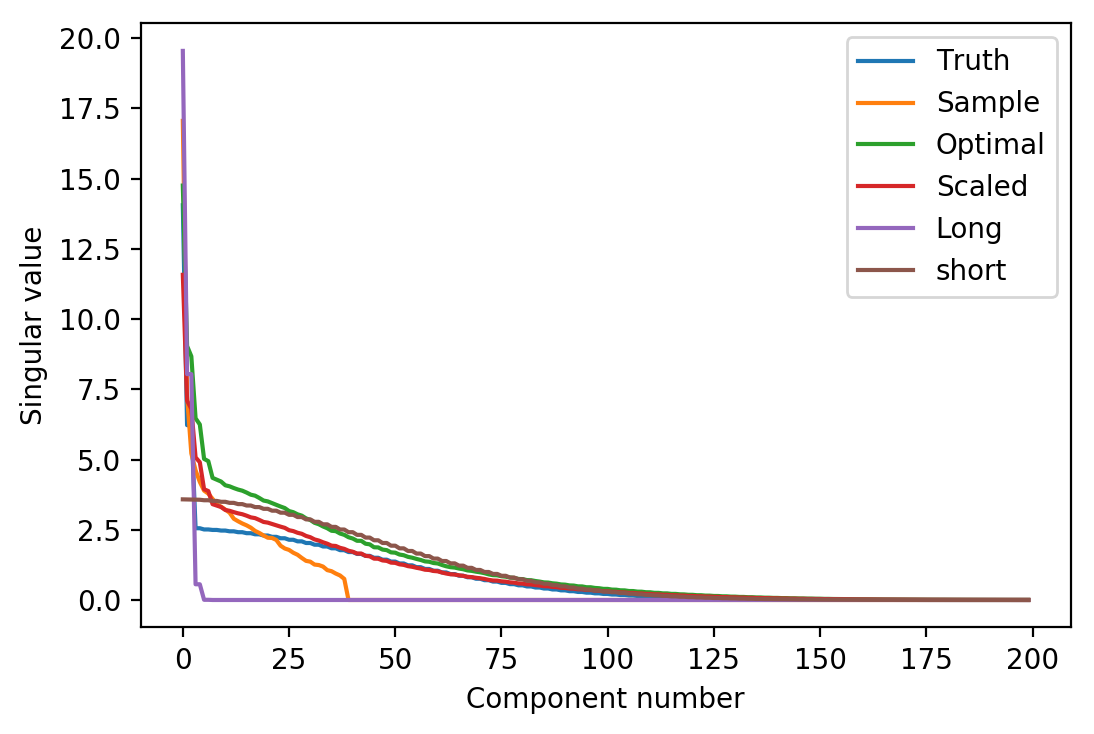

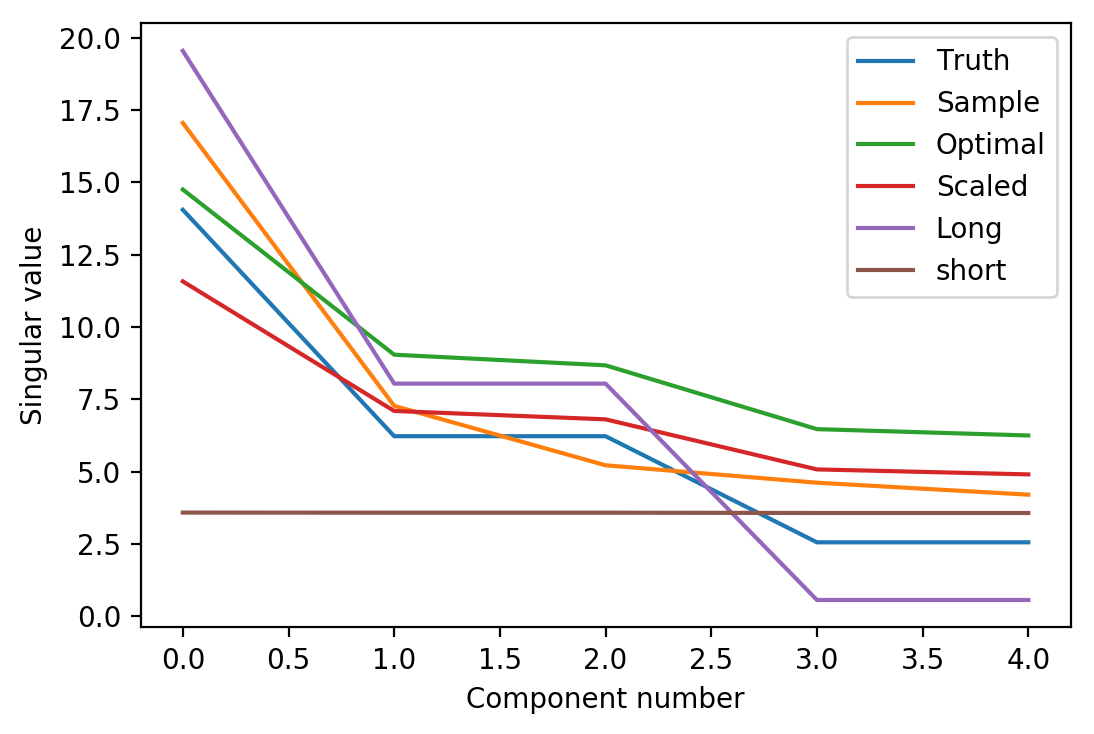

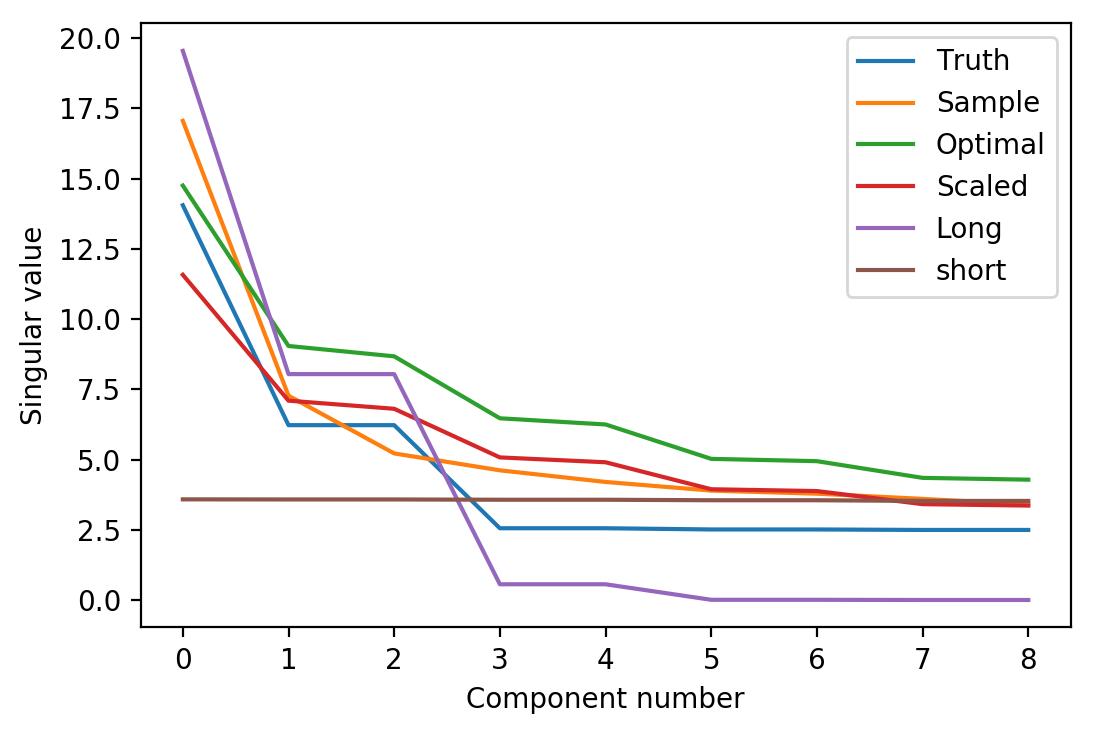

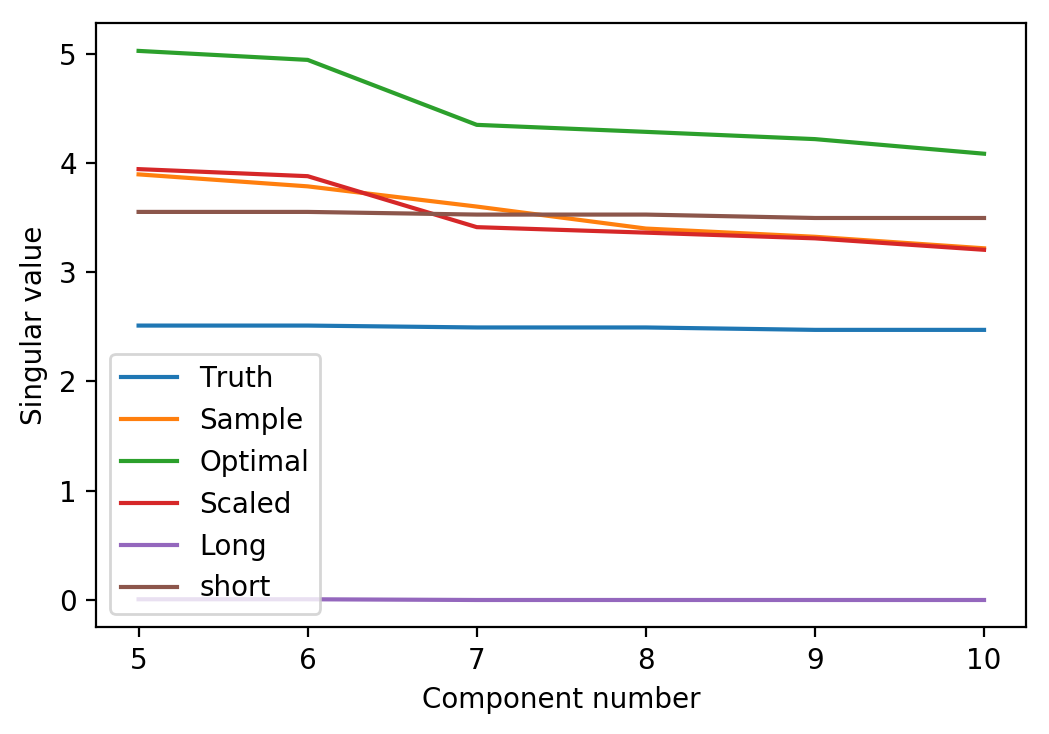

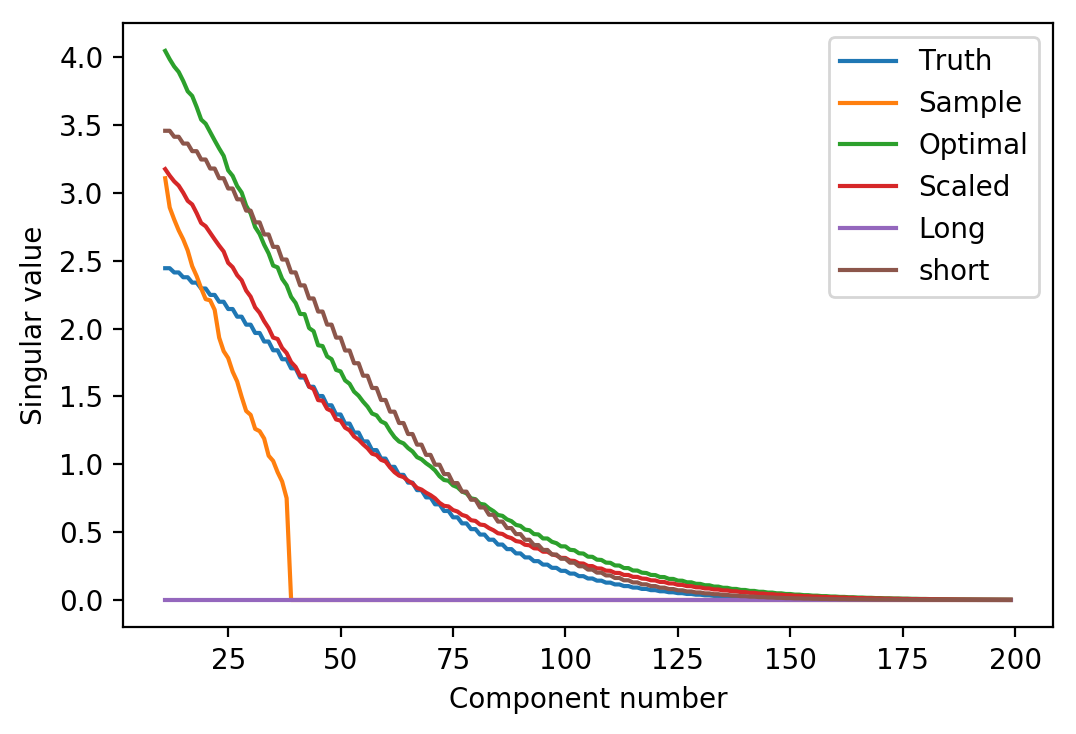

In [142]:
dpi = 200
x_sig = np.arange(S.diagonal().size)
x_sig[:this_total_sig],


opt_sum = opt_s_array[:this_total_sig].sum()
sample_sum = S_sample.diagonal()[:this_total_sig].sum()
plt.figure(dpi=dpi)
plt.plot(x_sig[:this_total_sig],
         S.diagonal()[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         S_sample.diagonal()[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         opt_s_array[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         opt_s_array_scaled[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         S_l.diagonal()[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         S_s.diagonal()[:this_total_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[:this_total_sig],
#          S.diagonal()[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          S_sample.diagonal()[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          opt_s_array[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          opt_s_array_scaled[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          S_l.diagonal()[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          S_s.diagonal()[:this_total_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')

this_min_sig = 0
this_max_sig = 5
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

this_min_sig = 0
this_max_sig = sig_array.sum()
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_sample.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array_scaled[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_l.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_s.diagonal()[this_min_sig:this_max_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')

this_min_sig = 5
this_max_sig = 11
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_sample.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array_scaled[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_l.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_s.diagonal()[this_min_sig:this_max_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')

this_min_sig = 11
this_max_sig = est_rank
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_sample.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array_scaled[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_l.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_s.diagonal()[this_min_sig:this_max_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')

In [ ]:
# rate of 1.5

Text(0,0.5,'Singular value')

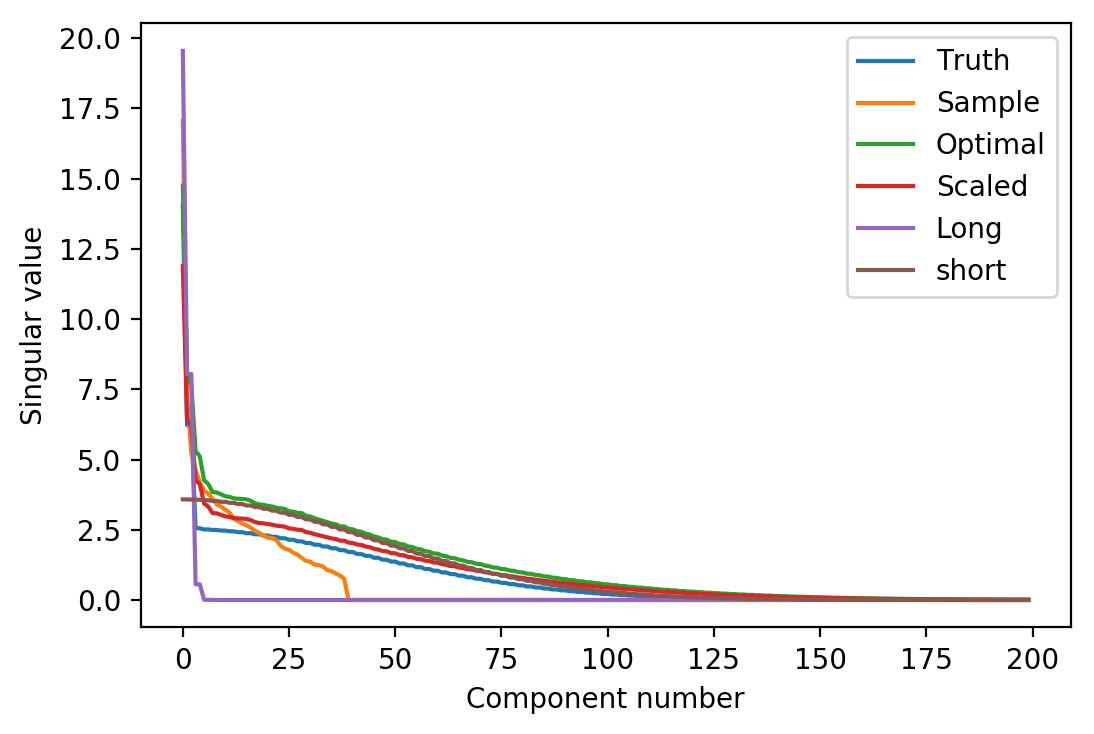

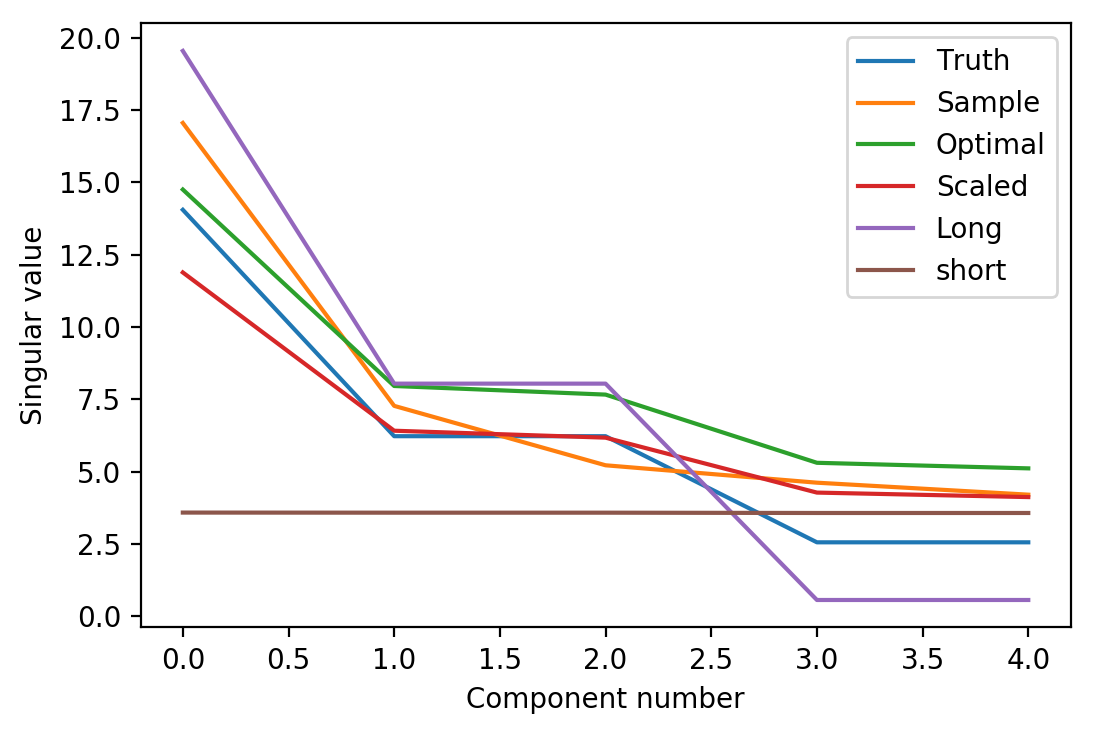

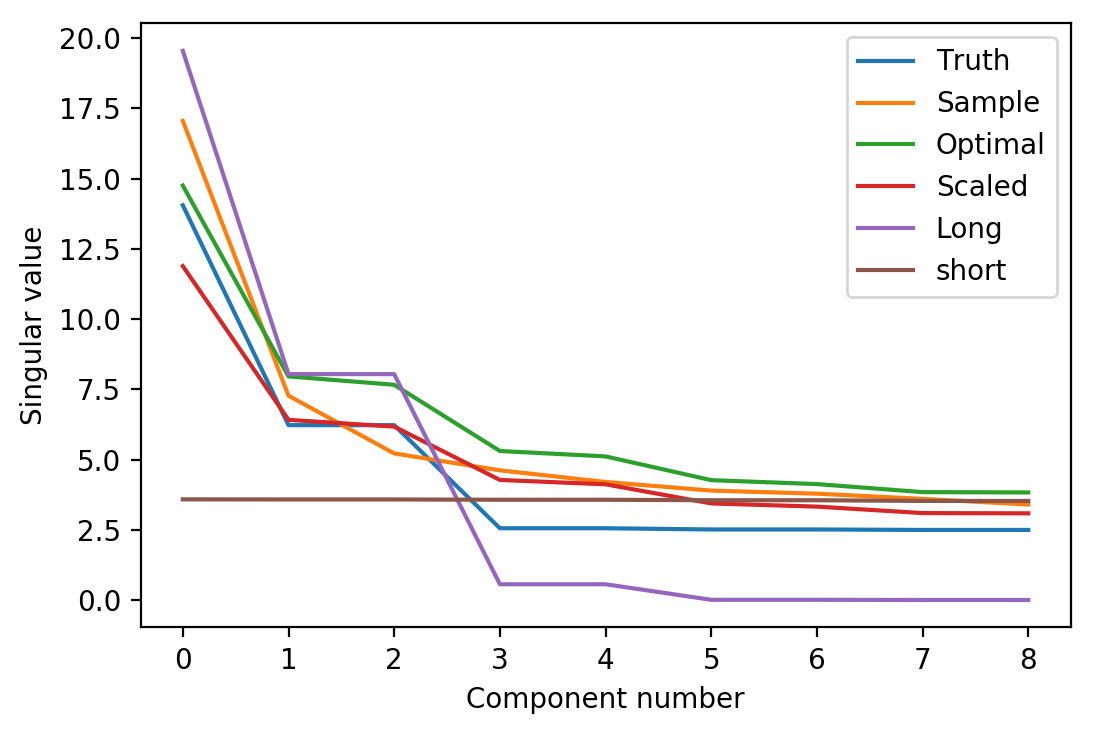

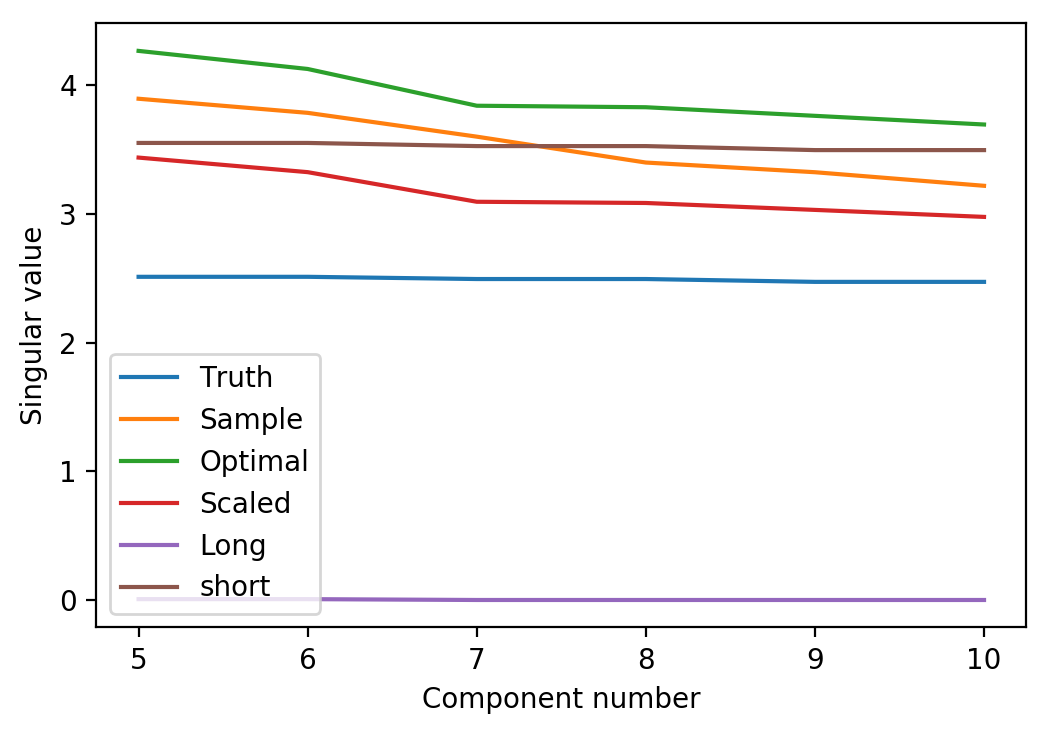

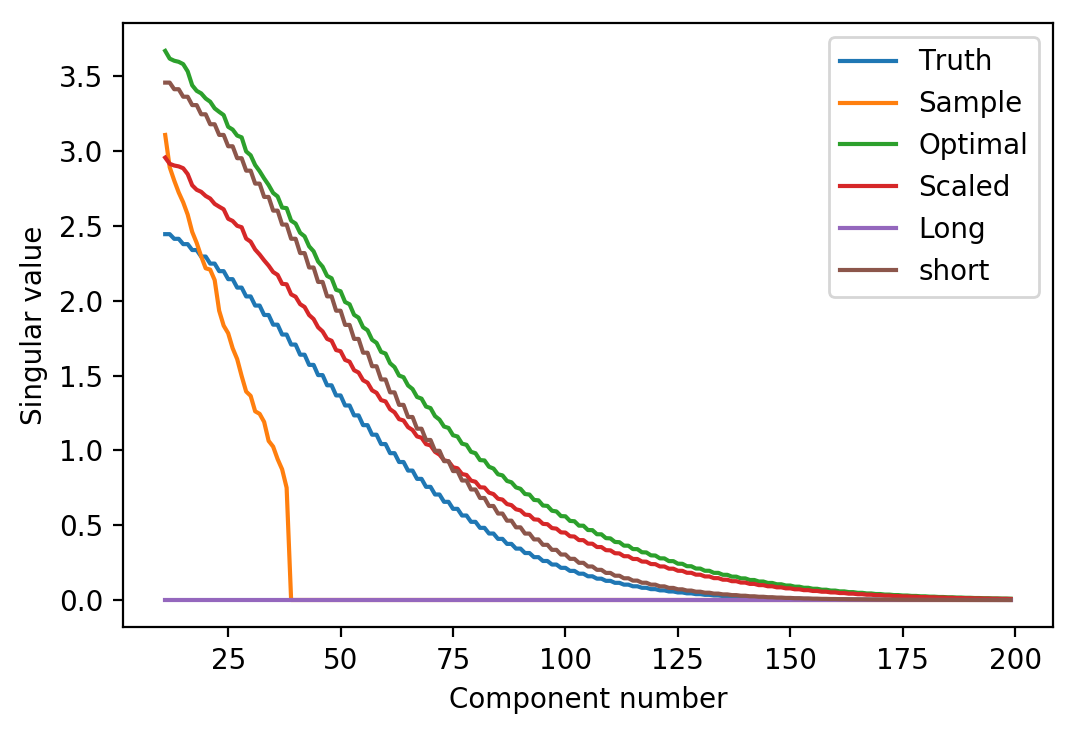

In [111]:
dpi = 200
x_sig = np.arange(S.diagonal().size)
x_sig[:this_total_sig],


opt_sum = opt_s_array[:this_total_sig].sum()
sample_sum = S_sample.diagonal()[:this_total_sig].sum()
plt.figure(dpi=dpi)
plt.plot(x_sig[:this_total_sig],
         S.diagonal()[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         S_sample.diagonal()[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         opt_s_array[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         opt_s_array_scaled[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         S_l.diagonal()[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         S_s.diagonal()[:this_total_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[:this_total_sig],
#          S.diagonal()[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          S_sample.diagonal()[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          opt_s_array[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          opt_s_array_scaled[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          S_l.diagonal()[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          S_s.diagonal()[:this_total_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')

this_min_sig = 0
this_max_sig = 5
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

this_min_sig = 0
this_max_sig = sig_array.sum()
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_sample.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array_scaled[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_l.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_s.diagonal()[this_min_sig:this_max_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')

this_min_sig = 5
this_max_sig = 11
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_sample.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array_scaled[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_l.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_s.diagonal()[this_min_sig:this_max_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')

this_min_sig = 11
this_max_sig = est_rank
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_sample.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array_scaled[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_l.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_s.diagonal()[this_min_sig:this_max_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')

In [ ]:
# rate of 2

Text(0,0.5,'Singular value')

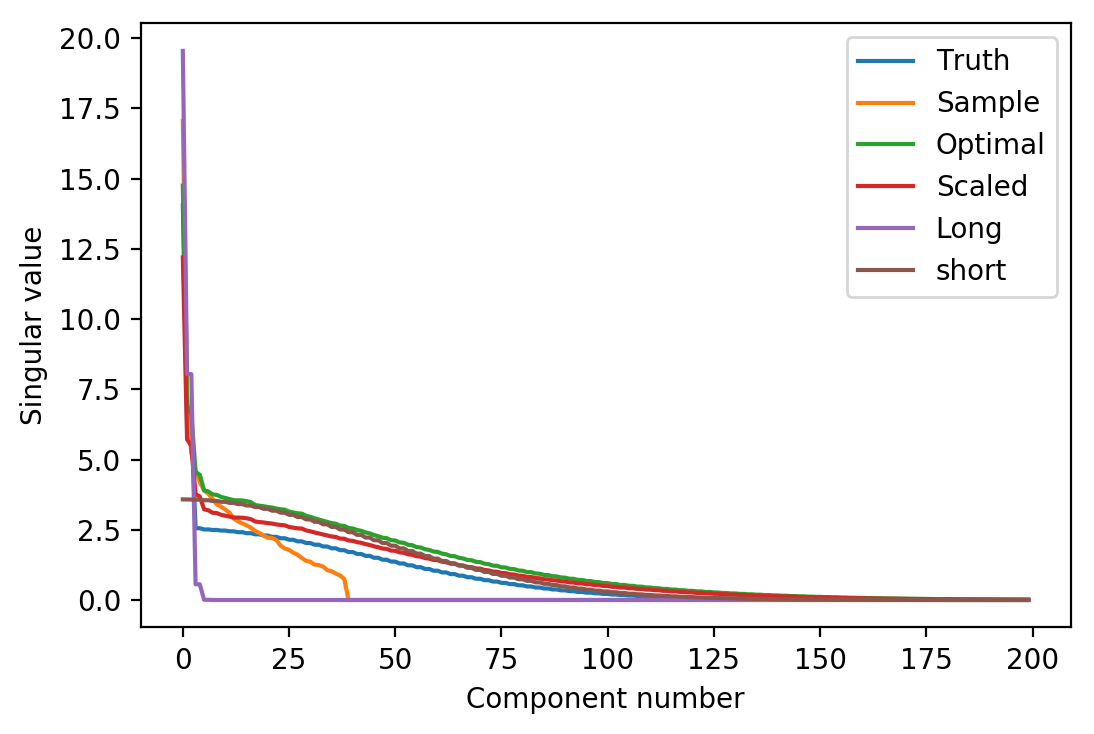

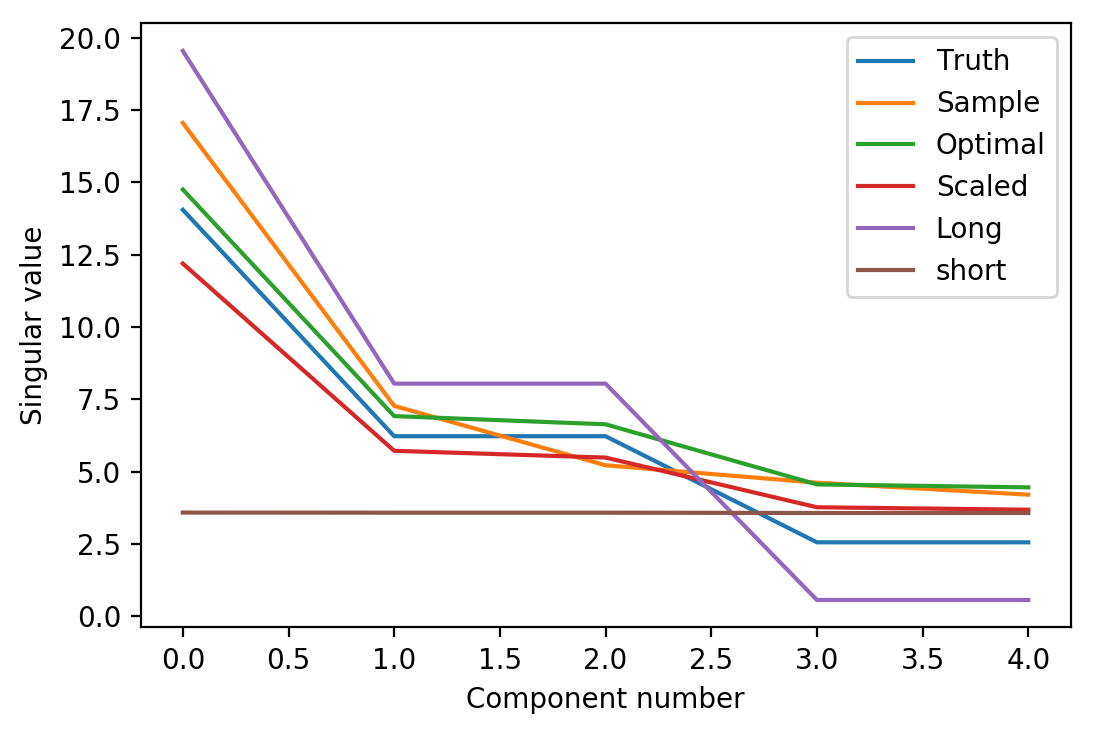

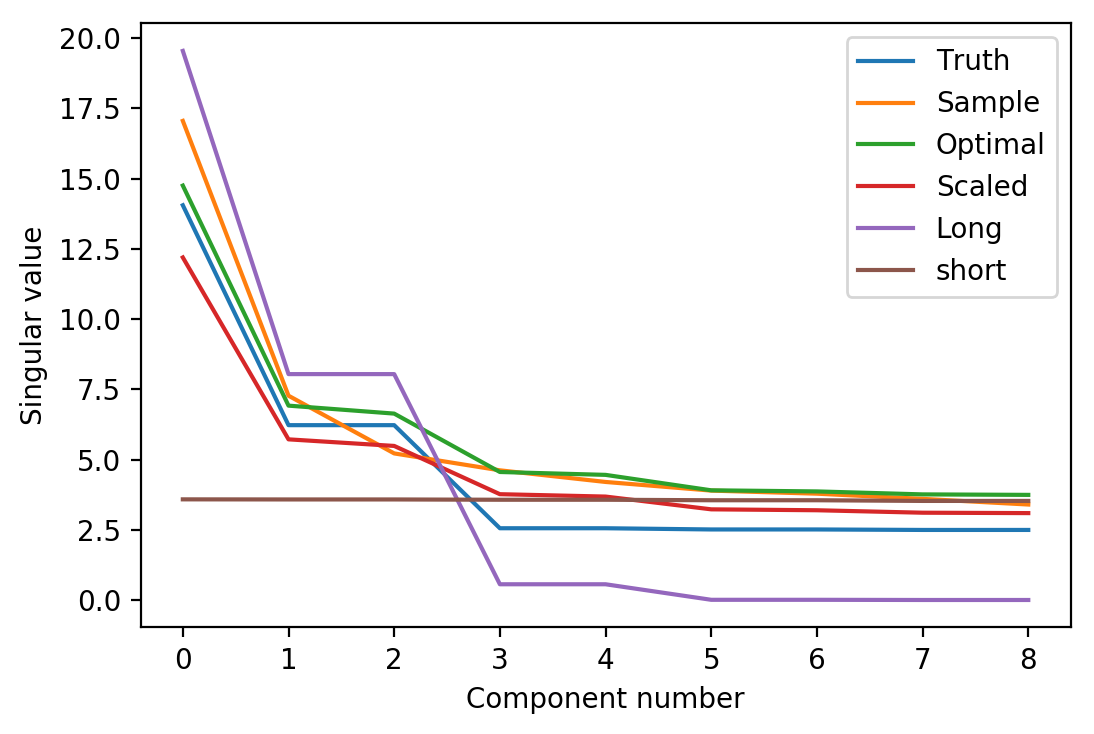

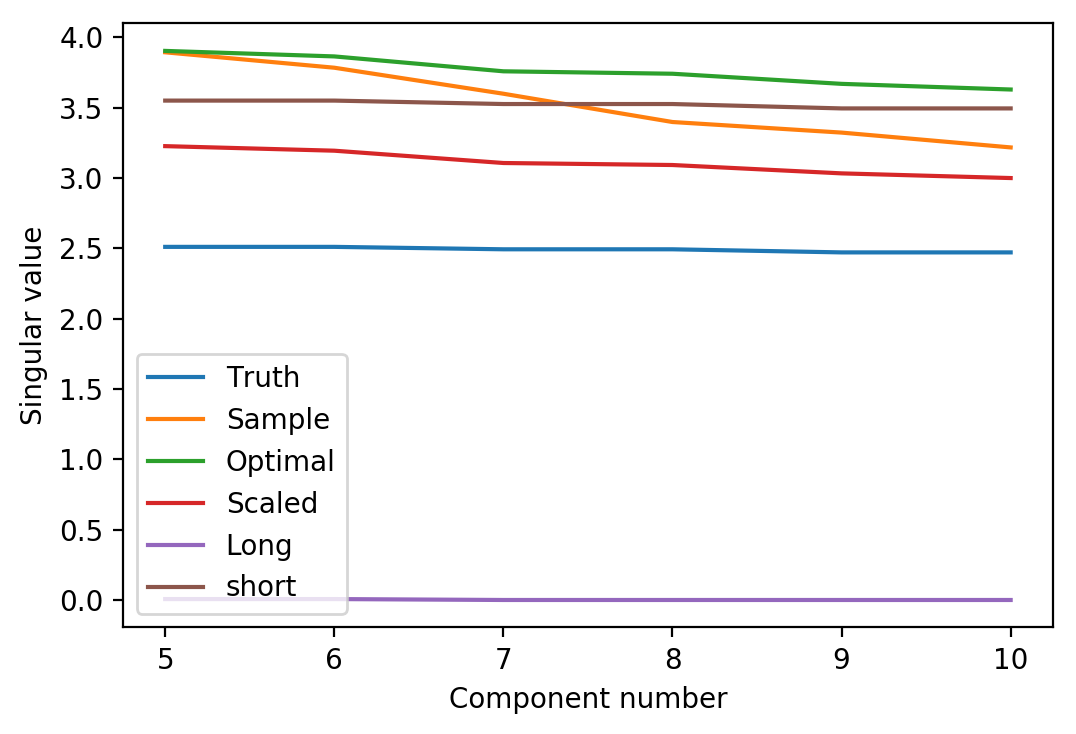

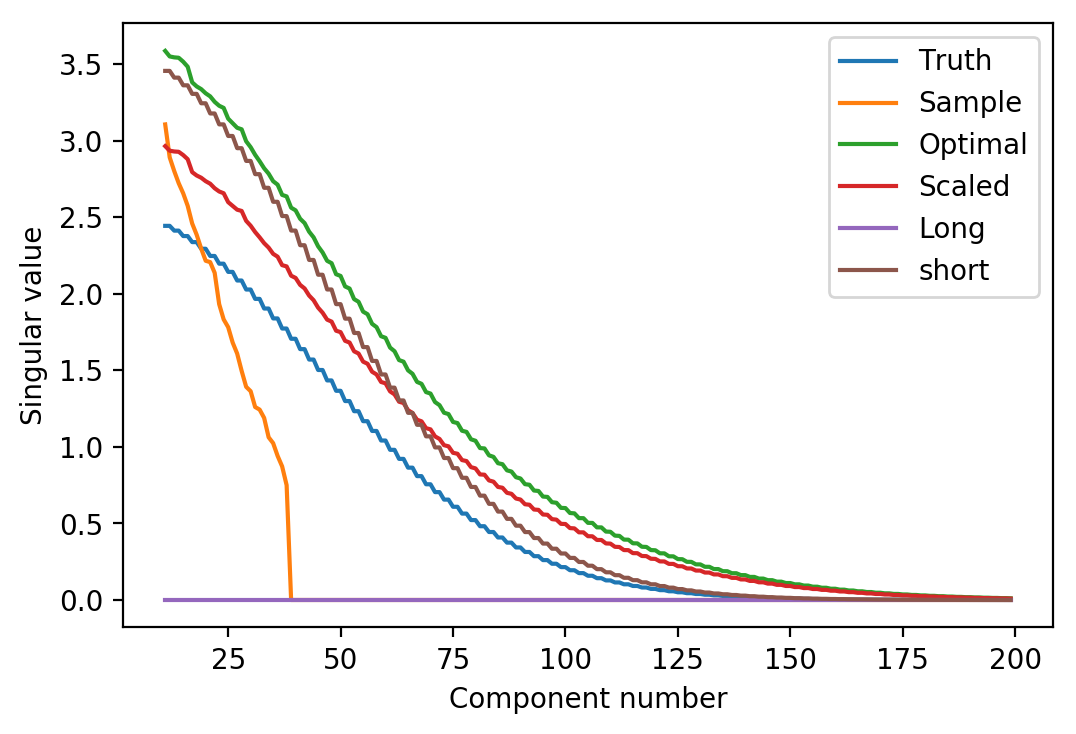

In [126]:
dpi = 200
x_sig = np.arange(S.diagonal().size)
x_sig[:this_total_sig],


opt_sum = opt_s_array[:this_total_sig].sum()
sample_sum = S_sample.diagonal()[:this_total_sig].sum()
plt.figure(dpi=dpi)
plt.plot(x_sig[:this_total_sig],
         S.diagonal()[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         S_sample.diagonal()[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         opt_s_array[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         opt_s_array_scaled[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         S_l.diagonal()[:this_total_sig])
plt.plot(x_sig[:this_total_sig],
         S_s.diagonal()[:this_total_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[:this_total_sig],
#          S.diagonal()[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          S_sample.diagonal()[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          opt_s_array[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          opt_s_array_scaled[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          S_l.diagonal()[:this_total_sig])
# plt.semilogy(x_sig[:this_total_sig],
#          S_s.diagonal()[:this_total_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')

this_min_sig = 0
this_max_sig = 5
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

this_min_sig = 0
this_max_sig = sig_array.sum()
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_sample.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array_scaled[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_l.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_s.diagonal()[this_min_sig:this_max_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')

this_min_sig = 5
this_max_sig = 11
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_sample.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array_scaled[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_l.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_s.diagonal()[this_min_sig:this_max_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')

this_min_sig = 11
this_max_sig = est_rank
plt.figure(dpi=dpi)
plt.plot(x_sig[this_min_sig:this_max_sig],
         S.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_sample.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         opt_s_array_scaled[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_l.diagonal()[this_min_sig:this_max_sig])
plt.plot(x_sig[this_min_sig:this_max_sig],
         S_s.diagonal()[this_min_sig:this_max_sig])
plt.legend([
    'Truth',
    'Sample',
    'Optimal',
    'Scaled',
    'Long',
    'short'
])
plt.xlabel('Component number')
plt.ylabel('Singular value')

# plt.figure(dpi=dpi)
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_sample.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          opt_s_array_scaled[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_l.diagonal()[this_min_sig:this_max_sig])
# plt.semilogy(x_sig[this_min_sig:this_max_sig],
#          S_s.diagonal()[this_min_sig:this_max_sig])
# plt.legend([
#     'Truth',
#     'Sample',
#     'Optimal',
#     'Scaled',
#     'Long',
#     'short'
# ])
# plt.xlabel('Component number')
# plt.ylabel('Singular value')